# <center> 🌐 👾 👨‍💻 ⚠ 🚨

# <center> 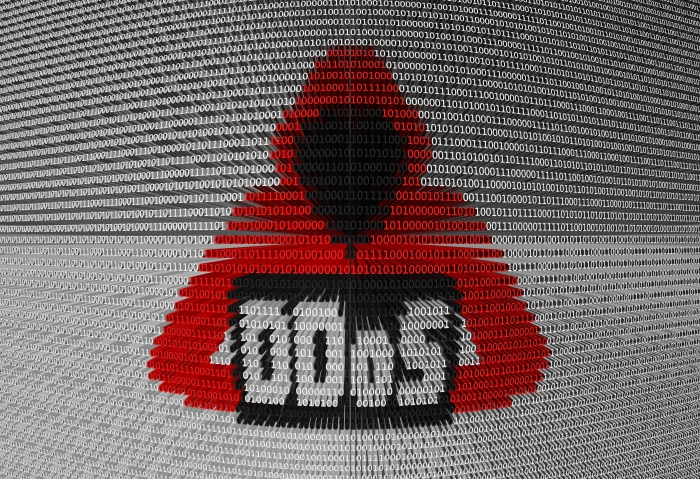

# <center> 🌐 👾 👨‍💻 ⚠ 🚨

Bugun biz DDos hujumlarni clasifikatsiya qilishni ko'rib chiqmimiz
Buning uchun biz Kanadaning kiberxavfsizlik instituti tomonidan tayyorlangan CICIDS2017(Canadian Institute for Cybersecurity Intrusion Detection System 2017) datasetidan foydalanamiz. Dataset bir necha kun davomida haqiqiy tarmoq faoliyatini o'z ichiga oladi. Biz datasetni o'rganib chiqamiz va hujumlarni clasifikatsiya qilish uchun model yaratib uni o'qitmaiz. 
# <center> 🤖 👮🏼

Datasetga link https://www.unb.ca/cic/datasets/ids-2017.html

Datasetga link Kaggle https://www.kaggle.com/datasets/devendra416/ddos-datasets  bu dataset CSE-CIC-IDS2018-AWS, CICIDS2017, CIC DoS dataset(2016) datasetlari yig'indisidan iborat.(Biz shu datasetdan foydalandik)

# <center> 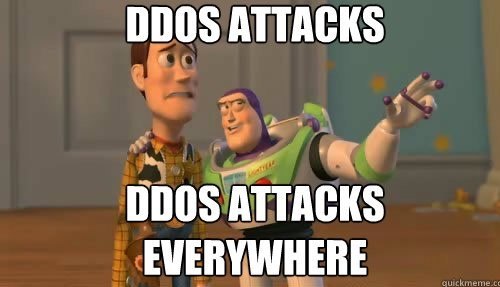

In [1]:
# Kerakli kutubxonlarni chaqirib olamiz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re
import seaborn as sn

In [2]:
pd.set_option('display.max_columns', None)
# hamma ustunlarni korish uchun ishlatamiz 

In [3]:
data = pd.read_csv("/kaggle/input/ddos-datasets/ddos_balanced/final_dataset.csv",nrows=8000000)
data
# biz 8 000 000 mln data-ni o'qib olyapmiz, hammasini o'qib olishning texnik jihatdan iloji yo'q
# datasetimiz 2 ta classdan tashkil topgan, bular
# ddos(Distributed Denial of Service)) - hujum patoklar 
# Benign - yaxshi patok(hujum emas)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,44,86.0,59811.0,86.0,0.0,2.965517,15.969799,1460.0,0.0,1359.340909,372.027190,15068.950821,18.365417,5.520642e+04,1.954783e+05,1566821.0,167.0,3735347.0,1.334052e+05,3.417757e+05,1805015.0,167.0,3974862.0,9.243865e+04,2.481748e+05,1566821.0,3997.0,0,0,0,0,768,896,7.295851,11.069567,0.0,1460.0,809.418919,728.862428,531240.438541,0,1,0,0,0,0,0,0,1.0,820.506849,2.965517,1359.340909,0,0,0,0,0,0,29,86,44,59811,-1,5840,1,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,31746.031746,6.300000e+01,0.000000e+00,63.0,63.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,20,20,15873.015873,15873.015873,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,-1,17520,0,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,6,86.0,3037.0,86.0,0.0,43.000000,60.811183,1460.0,0.0,506.166667,740.224403,6559.849436,16.803969,6.801114e+04,1.108627e+05,232203.0,6.0,134.0,1.340000e+02,0.000000e+00,134.0,134.0,476078.0,9.521560e+04,1.234673e+05,232601.0,6.0,0,0,0,0,40,136,4.200992,12.602977,0.0,1460.0,347.000000,632.515217,400075.500000,0,1,0,0,0,0,0,0,3.0,390.375000,43.000000,506.166667,0,0,0,0,0,0,2,86,6,3037,-1,5840,1,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,19867.549669,7.550000e+01,9.828784e+01,145.0,6.0,145.0,1.450000e+02,0.000000e+00,145.0,145.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,40,20,13245.033113,6622.516556,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,1,0,-1,17520,0,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,5,73.0,1050.0,73.0,0.0,36.500000,51.618795,1050.0,0.0,210.000000,469.574275,2376.684367,14.814595,7.875117e+04,1.186755e+05,232355.0,7.0,179.0,1.790000e+02,0.000000e+00,179.0,179.0,472507.0,1.181268e+05,1.317269e+05,232875.0,7.0,0,0,0,0,40,116,4.232742,10.581854,0.0,1050.0,140.375000,368.430624,135741.125000,0,1,0,0,0,0,0,0,2.0,160.428571,36.500000,210.000000,0,0,0,0,0,0,2,73,5,1050,-1,5840,1,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...

# <center> Ustunlarga ta'rif
#### 1. Flow ID - Oqimning unikal identifikatori(Уникальный идентификатор потока).
#### 2. Src IP(Source IP) - Manba IP manzili(IP-адрес источника).
#### 3. Src port(Source Port) - Manba porti(Порт источника).
#### 4. Dst IP(Destination IP) - Belgilangan IP manzili(IP-адрес назначения.).
#### 5. Dst Port(Destination Port) - Belgilangan port(Порт назначения.).
#### 6. Protokol - Protokol (TCP, UDP va boshqalar).
#### 7. Time stamp - Vaqt tamg'asi(Метка времени).
#### 8. Flow Duration - Oqimning davomiyligi(Продолжительность потока).
#### 9. Tot Fwd Pkts(Total Forward Packets) - Yuborilgan paketlarning umumiy soni(Общее количество отправленных пакетов).
#### 10. Tot Bwd Pkts(Total Backward Packets) - Qabul qilingan paketlarning umumiy soni(Общее количество полученных пакетов).
#### 11. TotLen Fwd Pkts(Total Length of Forward Packets) - Yuborilgan paketlarning umumiy uzunligi(Общая длина отправленных пакетов).
#### 12. TotLen Bwd Pkts(Total Length of Backward Packets) - Qabul qilingan paketlarning umumiy uzunligi(Общая длина полученных пакетов).
#### 13. Fwd Pkt Len Max(Maximum Length of Forward Packet:) - Yuborilgan paketning maksimal uzunligi(Максимальная длина отправленного пакета).
#### 14. Fwd Pkt Len Min(Minimum Length of Forward Packet) - Yuborilgan paketning minimal uzunligi(Минимальная длина отправленного пакета).
#### 15. Fwd Pkt Len Mean(Mean Length of Forward Packets) - Yuborilgan paketlarning o'rtacha uzunligi(Средняя длина отправленных пакетов).
#### 16. Fwd Pkt Len Std(Standard Deviation of Length of Forward Packets) - Yuborilgan paketlar uzunligining standart og'ishi(Стандартное отклонение длины отправленных пакетов).
#### 17. Bwd Pkt Len Max(Maximum Length of Backward Packet) - Qabul qilingan paketning maksimal uzunligi(Максимальная длина полученного пакета).
#### 18. Bwd Pkt Len Min(Minimum Length of Backward Packet) - Qabul qilingan paketning minimal uzunligi(Минимальная длина полученного пакета).
#### 19. Bwd Pkt Len Mean(Mean Length of Backward Packets) - Qabul qilingan paketlarning o'rtacha uzunligi(Средняя длина полученных пакетов).
#### 20. Bwd Pkt Len Std(Standard Deviation of Length of Backward Packets) - Qabul qilingan paketlar uzunligining standart og'ishi(Стандартное отклонение длины полученных пакетов).
#### 21. Flow Byts/s(Flow Bytes per Second) - Oqim uchun bayt/sekund(Байт/секунда для потока).
#### 22. Flow Pkts/s(Flow Packets per Second) - Oqim uchun paket/sekund(Пакет/секунда для потока).
#### 23. Flow IAT Mean(Mean Flow Inter-Arrival Time) - Oqimdagi paketlar orasidagi o'rtacha vaqt oralig'i(Средний интервал времени между пакетами в потоке).
#### 24. Flow IAT Std(Standard Deviation of Flow Inter-Arrival Time) - Oqimdagi paketlar orasidagi vaqt oralig'ining standart og'ishi(Стандартное отклонение интервала времени между пакетами в потоке).
#### 25. Flow IAT Max(Maximum Flow Inter-Arrival Time) - Oqimdagi paketlar orasidagi maksimal vaqt oralig'i(Максимальный интервал времени между пакетами в потоке).
#### 26. Flow IAT Min(Minimum Flow Inter-Arrival Time) - Oqimdagi paketlar orasidagi minimal vaqt oralig'i(инимальный интервал времени между пакетами в потоке).
#### 27. Fwd IAT Tot(Total Forward Inter-Arrival Time) - Yuborilgan paketlar orasidagi umumiy vaqt oralig'i(Общий интервал времени между отправленными пакетами).
#### 28. Fwd IAT Mean(Mean Forward Inter-Arrival Time) - Yuborilgan paketlar orasidagi o'rtacha vaqt oralig'i(Средний интервал времени между отправленными пакетами).
#### 29. Fwd IAT Std(Standard Deviation of Forward Inter-Arrival Time) - Yuborilgan paketlar orasidagi vaqt oralig'ining standart og'ishi(Стандартное отклонение интервала времени между отправленными пакетами).
#### 30. Fwd IAT Max(Maximum Forward Inter-Arrival Time) - yuborilgan paketlar orasidagi maksimal vaqt oralig'i(Максимальный интервал времени между отправленными пакетами).
#### 31. Fwd IAT Min(Minimum Forward Inter-Arrival Time) - Yuborilgan paketlar orasidagi minimal vaqt oralig'i(Минимальный интервал времени между отправленными пакетами).
#### 32. Bwd IAT Tot(Total Backward Inter-Arrival Time) - Qabul qilingan paketlar orasidagi umumiy vaqt oralig'i(Общий интервал времени между полученными пакетами).
#### 33. Bwd IAT Mean(Mean Backward Inter-Arrival Time) - Qabul qilingan paketlar orasidagi o'rtacha vaqt oralig'i(Средний интервал времени между полученными пакетами).
#### 34. Bwd IAT Std(Standard Deviation of Backward Inter-Arrival Time) - Qabul qilingan paketlar orasidagi vaqt oralig'ining standart og'ishi(Стандартное отклонение интервала времени между полученными пакетами).
#### 35. Bwd IAT Maks(Maximum Backward Inter-Arrival Time) - Qabul qilingan paketlar orasidagi maksimal vaqt oralig'i(Максимальный интервал времени между полученными пакетами).
#### 36. Bwd IAT Min(Minimum Backward Inter-Arrival Time) - Qabul qilingan paketlar orasidagi minimal vaqt oralig'i(Минимальный интервал времени между полученными пакетами).
#### 37. Fwd PSH Flags(Forward PUSH Flags) - Yuborilgan paketlar uchun PUSH bayroqlari(Флаги PUSH для отправленных пакетов).
#### 38. Bwd PSH Flags(Backward PUSH Flags) - Qabul qilingan paketlar uchun PUSH bayroqlari(Флаги PUSH для полученных пакетов).
#### 39. Fwd URG Flags(Forward URGENT Flags) - Yuborilgan paketlar uchun URGENT bayroqlari(Флаги URGENT для отправленных пакетов).
#### 40. Bwd URG Flags(Backward URGENT Flags) - Qabul qilingan paketlar uchun URGENT bayroqlari(Флаги URGENT для полученных пакетов).
#### 41. Fwd Header Len(Forward Header Length) - Yuborilgan paketlarning sarlavha uzunligi(Длина заголовка отправленных пакетов).
#### 42. Bwd Header Len(Backward Header Length) - Qabul qilingan paketlarning sarlavha uzunligi(Длина заголовка полученных пакетов).
#### 43. Fwd Pkts/s(Forward Packets per Second) - Bir soniyada yuboriladigan paketlar(Отправленные пакеты в секунду).
#### 44. Bwd Pkts/s(Backward Packets per Second) - Bir soniyada qabul qilingan paketlar(Полученные пакеты в секунду).
#### 45. Pkt Len Min(Minimum Packet Length) - Minimal paket uzunligi(Минимальная длина пакета).
#### 46. Pkt Len Max(Maximum Packet Length) - Maksimal paket uzunligi(Максимальная длина пакета).
#### 47. Pkt Len Mean(Mean Packet Length) - O'rtacha paket uzunligi(Средняя длина пакетов).
#### 48. Pkt Len Std(Standard Deviation of Packet Length) - Paket uzunligining standart og'ishi(Стандартное отклонение длины пакетов).
#### 49. Pkt Len Var(Variance of Packet Length) - Paket uzunligi farqi(Дисперсия длины пакетов).
#### 50. FIN Flag Cnt(FINISH Flag Count) -  FINISH bayroqlari soni(Количество флагов FINISH).
#### 51. SYN Flag Cnt(SYNCHRONIZE Flag Count) - SYNCHRONIZE bayroqlari soni(Количество флагов SYNCHRONIZE).
#### 52. RST Flag Cnt(RESET Flag Count) - RESET bayroqlari soni(Количество флагов RESET).
#### 53. PSH Flag Cnt(PUSH Flag Count) - PSH bayroqlari soni(Количество флагов PSH).
#### 54. ACK Flag Cnt(Acknowledgment Flag Count) - Acknowledgment bayroqlari soni(Количество флагов Acknowledgment).
#### 55. URG Flag Cnt(URGENT Flag Count) - URGENT bayroqlari soni(Количество флагов URGENT).
#### 56. CWE bayroqlari soni(CWE Flag Count) - CWE bayroqlari soni(Количество флагов CWE).
#### 57. ECE Flag Cnt(ECE(Explicit Congestion Notification Echo) Flag Count) - ECE(Explicit Congestion Notification Echo) bayroqlari soni(Количество флагов ECE(Explicit Congestion Notification Echo)).
#### 58. Down/Up Ratio(Down/Up Ratio) - Kiruvchi va chiquvchi trafik nisbati(Соотношение входящего и исходящего трафика).
#### 59. Pkt Size Avg(Average Packet Size) - O'rtacha paket hajmi(Средний размер пакета).
#### 60. Fwd Seg Size Avg(Average Forward Segment Size) - Yuborilgan paketlarning o'rtacha segment hajmi(Средний размер сегмента отправленных пакетов).
#### 61. Bwd Seg Size Avg(Average Backward Segment Size:) - Qabul qilingan paketlarning o'rtacha segment hajmi(Средний размер сегмента полученных пакетов).
#### 62. Fwd Byts/b Avg(Average Forward Bytes per Bulk) - Bir paketga yuborilgan baytlarning o'rtacha soni(Среднее количество пересылаемых байтов на один пакет).
#### 63. Fwd Pkts/b Avg(Average Forward Packets per Bulk) - Har bir yuborilgan blok uchun paketlarning o'rtacha soni soni(Среднее количество пакетов на отправленный блок).
#### 64. Fwd Blk Rate Avg(Average Forward Bulk Rate) - Yuborilgan bloklarning o'rtacha tezligi(Средняя скорость отправленных блоков).
#### 65. Bwd Byts/b Avg(Average Backward Bytes per Bulk) - Qabul qilingan bayt uchun o'rtacha bayt soni(реднее количество байт на полученный блок).
#### 66. Bwd Pkts/b Avg(Average Backward Packets per Bulk) - Qabul qilingan bayt uchun paketlarning o'rtacha soni(Среднее количество пакетов на полученный блок).
#### 67. Bwd Blk Rate Avg(Average Backward Bulk Rate) - Qabul qilingan bloklarning o'rtacha tezligi(Средняя скорость полученных блоков).
#### 68. Subflow Fwd Pkts(Subflow Forward Packets) - Yuborilgan paketlarning quyi oqimi soni(Количество пакетов в подпотоке отправленных пакетов).
#### 69. Subflow Fwd byts(Subflow Forward Bytes) - Yuborilgan baytlar, quyi oqimidagi baytlar soni(Количество байт в подпотоке отправленных байт).
#### 70. Subflow Bwd Pkts(Subflow Backward Packets:) - Qabul qilingan paketlarning quyi oqimidagi paketlar soni(Количество пакетов в подпотоке полученных пакетов).
#### 71. Subflow Bwd Byts(Subflow Backward Bytes) - Qabul qilingan bayt, quyi oqimidagi baytlar soni(Количество байт в подпотоке полученных байт).
#### 72. Init Fwd Win Byts(Initial Forward Window Bytes) - Yuborilgan paketlar oynasining boshlang'ich baytlari(Начальные байты окна отправленных пакетов).
#### 73. Init Bwd Win Byts(Initial Backward Window Bytes) - Qabul qilingan paketlar oynasining boshlang'ich baytlari(Начальные байты окна полученных пакетов).
#### 74. Fwd Act Data Pkts(Forward Active Data Packets) - Yuborilgan paketlardagi faol ma'lumotlar soni(Количество активных данных в отправленных пакетах).
#### 75. Fwd Seg Size Min(Minimum Forward Segment Size) - Yuborilgan paketlarning minimal segment hajmi(Минимальный размер сегмента отправленных пакетов).
#### 76. Active Mean(Mean Active Time) - O'rtacha faollik vaqti(Среднее время активности).
#### 77. Active Std(Standard Deviation of Active Time) - Faol vaqtining standart og'ishi(Стандартное отклонение времени активности).
#### 78. Active Max(Maximum Active Time) - Maksimal faollik vaqti(Максимальное время активности).
#### 79. Active Min(Minimum Active Time) - Minimal faolllik vaqti(Минимальное время активности).
#### 80. Idle Mean(Mean Idle Time) - O'rtacha ishlamay turish vaqti(Среднее свабодная время).
#### 81. Idle Std(Standard Deviation of Idle Time) - Bo'sh vaqtning standart og'ishi(Стандартное отклонение свабодного времени).
#### 82. Idle Max(Maximum Idle Time) - maksimal bo'sh vaqt(Максимальное свабодная время).
#### 83. Idle Min(Minimum Idle Time) - Minimal bo'sh vaqt(Минимальное свабодная время).
#### 84. Label(Label) -  Sinf yorlig'i (masalan, oddiy yoki hujum).Метка класса (например, нормальный или атака).

/tmp/ipykernel_33/4136279464.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(label_counts))


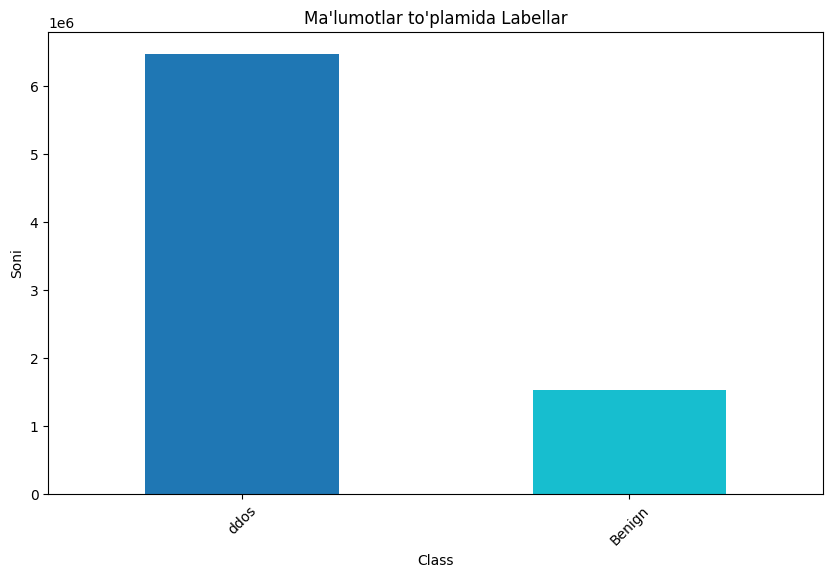

In [4]:
label_counts = data['Label'].value_counts()

colors = plt.cm.get_cmap('tab10', len(label_counts))

# Diagramma orqali datasetdagi ma'lumotlarni ko'rib chiqamiz
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=[colors(i) for i in range(len(label_counts))])
plt.title("Ma'lumotlar to'plamida Labellar")
plt.xlabel('Class')
plt.ylabel('Soni')
plt.xticks(rotation=45)
plt.show()
# Model yaxshi ishlashi uchun datasetimizda balans bo'lishi kerak
# ko'rib turganingizdek ddos haddan tashqari ko'p, buni to'g'irlash kerak

In [5]:
label_counts

Label
ddos      6472647
Benign    1527353
Name: count, dtype: int64

In [6]:
# Benign classlarni alohida olamiz
class_Benign = data[data['Label'] == 'Benign'] 
class_Benign

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
6472647,1445871,172.31.0.2-172.31.66.76-53-55330-17,172.31.66.76,55330,172.31.0.2,53,17,20/02/2018 10:36:27,22123,2,2,72.0,194.0,36.0,36.0,36.000000,0.000000,97.0,97.0,97.000000,0.000000,12023.685757,180.807305,7.374333e+03,1.131594e+04,20432.0,429.0,21694.0,2.169400e+04,0.000000e+00,21694.0,21694.0,20861.0,2.086100e+04,0.000000e+00,20861.0,20861.0,0,0,0,0,16,16,90.403652,90.403652,36.0,97.0,60.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1.0,75.500000,36.000000,97.000000,0,0,0,0,0,0,2,72,2,194,-1,-1,1,8,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
6472648,283411,172.217.9.228-192.168.10.15-443-53799-6,192.168.10.15,53799,172.217.9.228,443,6,04/07/2017 12:15:36 AM,3095495,4,2,77.0,92.0,46.0,0.0,19.250000,23.056091,46.0,46.0,46.000000,0.000000,54.595469,1.938301,6.190990e+05,1.322575e+06,2984691.0,3.0,3001930.0,1.000643e+06,1.718257e+06,2984691.0,3.0,37178.0,3.717800e+04,0.000000e+00,37178.0,37178.0,0,1,0,0,80,40,1.292200,0.646100,0.0,46.0,30.714286,21.684974,470.238095,0,0,0,1,1,0,0,0,0.0,35.833333,19.250000,46.000000,0,0,0,0,0,0,4,77,2,92,-1,360,2,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
6472649,6626404,129.158.72.21-172.31.66.121-56889-3389-6,129.158.72.21,56889,172.31.66.121,3389,6,20/02/2018 08:55:58,1127340,8,7,1052.0,1429.0,581.0,0.0,131.500000,196.372096,1149.0,0.0,204.142857,420.499080,2200.755761,13.305658,8.052429e+04,2.559872e+05,968741.0,3.0,1127340.0,1.610486e+05,3.819449e+05,1026973.0,3.0,1114653.0,1.857755e+05,3.841019e+05,968741.0,13853.0,0,0,0,0,172,152,7.096351,6.209307,0.0,1149.0,155.062500,302.897005,91746.595833,0,0,1,1,0,0,0,1,0.0,165.400000,131.500000,204.142857,0,0,0,0,0,0,8,1052,7,1429,8192,62948,5,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
6472650,6314547,172.31.65.117-23.218.55.94-51263-443-6,172.31.65.117,51263,23.218.55.94,443,6,20/02/2018 11:53:46,105120546,16,24,1789.0,3492.0,270.0,0.0,111.812500,116.186757,1053.0,0.0,145.500000,235.555772,50.237563,0.380516,2.695399e+06,5.764629e+06,14914967.0,1.0,105120546.0,7.008036e+06,7.603899e+06,14914967.0,126951.0,105099616.0,4.569549e+06,6.974720e+06,14936234.0,1.0,1,0,0,0,320,480,0.152206,0.228309,0.0,1053.0,134.097561,193.430841,37415.490244,0,1,0,0,1,0,0,0,1.0,137.450000,111.812500,145.500000,0,0,0,0,0,0,16,1789,24,3492,254,2105,7,20,1.377087e+05,1.118859e+04,158091.0,126951.0,1.486128e+07,31810.084689,14914967.0,14824695.0,Benign
6472651,7887478,172.31.67.95-94.25.169.113-445-35818-6,94.25.169.113,35818,172.31.67.95,445,6,20/02/2018 10:06:32,1088596,6,6,389.0,209.0,103.0,0.0,64.833333,50.530849,131.0,0.0,34.833333,50.838634,549.331432,11.023373,9.896327e+04,1.550942e+05,495922.0,3.0,1088531.0,2.177062e+05,1.782854e+05,496014.0,3.0,1088550.0,2.177100e+05,1.669438e+05,495963.0,43404.0,0,0,0,0,132,144,5.511687,5.511687,0.0,131.0,46.000000,50.565140,2556.83333

In [7]:
# Benign classda nan qiymatlarni tekshiramiz
# 1 ta ustunimizda 7215 da nan qiymat bor ekan
nan_qiymatalar = class_Benign.isna().sum()
for i in range(len(nan_qiymatalar)):
    print(nan_qiymatalar[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7215
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/tmp/ipykernel_33/3670723075.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(nan_qiymatalar[i])


In [8]:
# nan bo'lgan qiymatlarni o'chirib tashlaymiz
class_Benign = class_Benign.dropna()

print(f"O'chirishdan keyingi ma'lumotlarimiz soni: {len(class_Benign)}")

O'chirishdan keyingi ma'lumotlarimiz soni: 1520138


In [9]:
class_Benign

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
6472647,1445871,172.31.0.2-172.31.66.76-53-55330-17,172.31.66.76,55330,172.31.0.2,53,17,20/02/2018 10:36:27,22123,2,2,72.0,194.0,36.0,36.0,36.000000,0.000000,97.0,97.0,97.000000,0.000000,12023.685757,180.807305,7.374333e+03,1.131594e+04,20432.0,429.0,21694.0,2.169400e+04,0.000000e+00,21694.0,21694.0,20861.0,2.086100e+04,0.000000e+00,20861.0,20861.0,0,0,0,0,16,16,90.403652,90.403652,36.0,97.0,60.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1.0,75.500000,36.000000,97.000000,0,0,0,0,0,0,2,72,2,194,-1,-1,1,8,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
6472648,283411,172.217.9.228-192.168.10.15-443-53799-6,192.168.10.15,53799,172.217.9.228,443,6,04/07/2017 12:15:36 AM,3095495,4,2,77.0,92.0,46.0,0.0,19.250000,23.056091,46.0,46.0,46.000000,0.000000,54.595469,1.938301,6.190990e+05,1.322575e+06,2984691.0,3.0,3001930.0,1.000643e+06,1.718257e+06,2984691.0,3.0,37178.0,3.717800e+04,0.000000e+00,37178.0,37178.0,0,1,0,0,80,40,1.292200,0.646100,0.0,46.0,30.714286,21.684974,470.238095,0,0,0,1,1,0,0,0,0.0,35.833333,19.250000,46.000000,0,0,0,0,0,0,4,77,2,92,-1,360,2,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
6472649,6626404,129.158.72.21-172.31.66.121-56889-3389-6,129.158.72.21,56889,172.31.66.121,3389,6,20/02/2018 08:55:58,1127340,8,7,1052.0,1429.0,581.0,0.0,131.500000,196.372096,1149.0,0.0,204.142857,420.499080,2200.755761,13.305658,8.052429e+04,2.559872e+05,968741.0,3.0,1127340.0,1.610486e+05,3.819449e+05,1026973.0,3.0,1114653.0,1.857755e+05,3.841019e+05,968741.0,13853.0,0,0,0,0,172,152,7.096351,6.209307,0.0,1149.0,155.062500,302.897005,91746.595833,0,0,1,1,0,0,0,1,0.0,165.400000,131.500000,204.142857,0,0,0,0,0,0,8,1052,7,1429,8192,62948,5,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
6472650,6314547,172.31.65.117-23.218.55.94-51263-443-6,172.31.65.117,51263,23.218.55.94,443,6,20/02/2018 11:53:46,105120546,16,24,1789.0,3492.0,270.0,0.0,111.812500,116.186757,1053.0,0.0,145.500000,235.555772,50.237563,0.380516,2.695399e+06,5.764629e+06,14914967.0,1.0,105120546.0,7.008036e+06,7.603899e+06,14914967.0,126951.0,105099616.0,4.569549e+06,6.974720e+06,14936234.0,1.0,1,0,0,0,320,480,0.152206,0.228309,0.0,1053.0,134.097561,193.430841,37415.490244,0,1,0,0,1,0,0,0,1.0,137.450000,111.812500,145.500000,0,0,0,0,0,0,16,1789,24,3492,254,2105,7,20,1.377087e+05,1.118859e+04,158091.0,126951.0,1.486128e+07,31810.084689,14914967.0,14824695.0,Benign
6472651,7887478,172.31.67.95-94.25.169.113-445-35818-6,94.25.169.113,35818,172.31.67.95,445,6,20/02/2018 10:06:32,1088596,6,6,389.0,209.0,103.0,0.0,64.833333,50.530849,131.0,0.0,34.833333,50.838634,549.331432,11.023373,9.896327e+04,1.550942e+05,495922.0,3.0,1088531.0,2.177062e+05,1.782854e+05,496014.0,3.0,1088550.0,2.177100e+05,1.669438e+05,495963.0,43404.0,0,0,0,0,132,144,5.511687,5.511687,0.0,131.0,46.000000,50.565140,2556.83333

In [10]:
# endi ddos classdan ham benign classda qancha data bo'lsa shuncha data olamiz
class_ddos = data[data['Label'] == 'ddos'] 

#  NaN qiymatli qatorlarni o'chirib tashlaymiz
class_ddos = class_ddos.dropna()

# Birinchi bo'lib ddos classda bizga yetarli data bor yoki yo'qligini tekshiramiz
if len(class_ddos) >= 1520138:
    # random 1,520,138 ta data olamiz
    sampled_data = class_ddos.sample(n=1520138, random_state=42)
    
    print(f"{len(sampled_data)} ta data olindi.")
else:
    print("ddos datasetimizda data yetarli emas.")

1520138 ta data olindi.


In [11]:
# 2 ta datasetdan bitta dataset hosil qilamiz
combined_data = pd.concat([class_Benign, sampled_data], ignore_index=True)
combined_data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1445871,172.31.0.2-172.31.66.76-53-55330-17,172.31.66.76,55330,172.31.0.2,53,17,20/02/2018 10:36:27,22123,2,2,72.0,194.0,36.0,36.0,36.000000,0.000000,97.0,97.0,97.000000,0.000000,12023.685757,180.807305,7.374333e+03,1.131594e+04,20432.0,429.0,21694.0,2.169400e+04,0.000000e+00,21694.0,21694.0,20861.0,2.086100e+04,0.000000e+00,20861.0,20861.0,0,0,0,0,16,16,90.403652,90.403652,36.0,97.0,60.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1.0,75.500000,36.000000,97.000000,0,0,0,0,0,0,2,72,2,194,-1,-1,1,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
1,283411,172.217.9.228-192.168.10.15-443-53799-6,192.168.10.15,53799,172.217.9.228,443,6,04/07/2017 12:15:36 AM,3095495,4,2,77.0,92.0,46.0,0.0,19.250000,23.056091,46.0,46.0,46.000000,0.000000,54.595469,1.938301,6.190990e+05,1.322575e+06,2984691.0,3.0,3001930.0,1.000643e+06,1.718257e+06,2984691.0,3.0,37178.0,3.717800e+04,0.000000e+00,37178.0,37178.0,0,1,0,0,80,40,1.292200,0.646100,0.0,46.0,30.714286,21.684974,470.238095,0,0,0,1,1,0,0,0,0.0,35.833333,19.250000,46.000000,0,0,0,0,0,0,4,77,2,92,-1,360,2,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
2,6626404,129.158.72.21-172.31.66.121-56889-3389-6,129.158.72.21,56889,172.31.66.121,3389,6,20/02/2018 08:55:58,1127340,8,7,1052.0,1429.0,581.0,0.0,131.500000,196.372096,1149.0,0.0,204.142857,420.499080,2200.755761,13.305658,8.052429e+04,2.559872e+05,968741.0,3.0,1127340.0,1.610486e+05,3.819449e+05,1026973.0,3.0,1114653.0,1.857755e+05,3.841019e+05,968741.0,13853.0,0,0,0,0,172,152,7.096351,6.209307,0.0,1149.0,155.062500,302.897005,91746.595833,0,0,1,1,0,0,0,1,0.0,165.400000,131.500000,204.142857,0,0,0,0,0,0,8,1052,7,1429,8192,62948,5,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
3,6314547,172.31.65.117-23.218.55.94-51263-443-6,172.31.65.117,51263,23.218.55.94,443,6,20/02/2018 11:53:46,105120546,16,24,1789.0,3492.0,270.0,0.0,111.812500,116.186757,1053.0,0.0,145.500000,235.555772,50.237563,0.380516,2.695399e+06,5.764629e+06,14914967.0,1.0,105120546.0,7.008036e+06,7.603899e+06,14914967.0,126951.0,105099616.0,4.569549e+06,6.974720e+06,14936234.0,1.0,1,0,0,0,320,480,0.152206,0.228309,0.0,1053.0,134.097561,193.430841,37415.490244,0,1,0,0,1,0,0,0,1.0,137.450000,111.812500,145.500000,0,0,0,0,0,0,16,1789,24,3492,254,2105,7,20,137708.714286,11188.587008,158091.0,126951.0,1.486128e+07,31810.084689,14914967.0,14824695.0,Benign
4,7887478,172.31.67.95-94.25.169.113-445-35818-6,94.25.169.113,35818,172.31.67.95,445,6,20/02/2018 10:06:32,1088596,6,6,389.0,209.0,103.0,0.0,64.833333,50.530849,131.0,0.0,34.833333,50.838634,549.331432,11.023373,9.896327e+04,1.550942e+05,495922.0,3.0,1088531.0,2.177062e+05,1.782854e+05,496014.0,3.0,1088550.0,2.177100e+05,1.669438e+05,495963.0,43404.0,0,0,0,0,132,144,5.511687,5.511687,0.0,131.0,46.000000,50.565140,2556.833333,0,0,0,1,0,0,0,0,1.0,49.833333,64.833333,34.833333,0

/tmp/ipykernel_33/1500705440.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(label_counts))


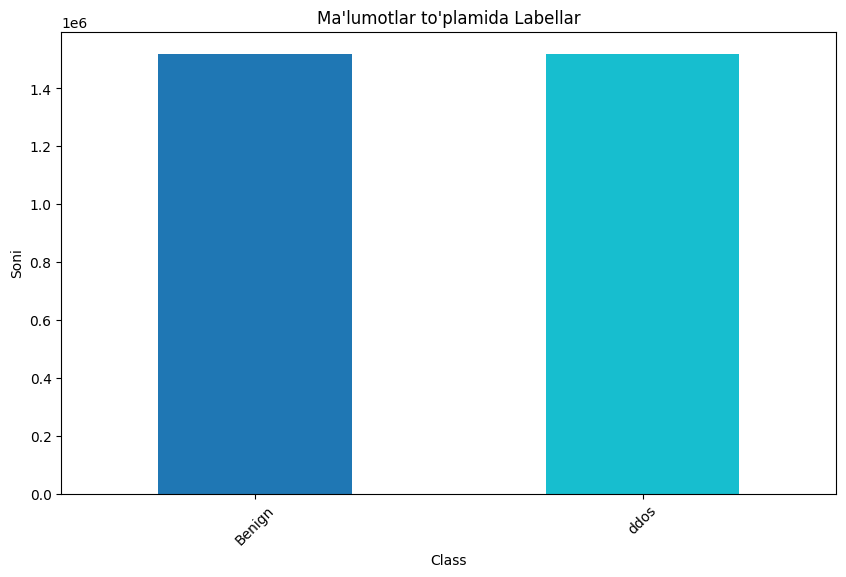

In [12]:
label_counts = combined_data['Label'].value_counts()

colors = plt.cm.get_cmap('tab10', len(label_counts))

# classlarni solishtirib ko'ramiz
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=[colors(i) for i in range(len(label_counts))])
plt.title("Ma'lumotlar to'plamida Labellar")
plt.xlabel('Class')
plt.ylabel('Soni')
plt.xticks(rotation=45)
plt.show()
# endi datamizda classlar soni teng

In [13]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040276 entries, 0 to 3040275
Data columns (total 85 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Flow ID            object 
 2   Src IP             object 
 3   Src Port           int64  
 4   Dst IP             object 
 5   Dst Port           int64  
 6   Protocol           int64  
 7   Timestamp          object 
 8   Flow Duration      int64  
 9   Tot Fwd Pkts       int64  
 10  Tot Bwd Pkts       int64  
 11  TotLen Fwd Pkts    float64
 12  TotLen Bwd Pkts    float64
 13  Fwd Pkt Len Max    float64
 14  Fwd Pkt Len Min    float64
 15  Fwd Pkt Len Mean   float64
 16  Fwd Pkt Len Std    float64
 17  Bwd Pkt Len Max    float64
 18  Bwd Pkt Len Min    float64
 19  Bwd Pkt Len Mean   float64
 20  Bwd Pkt Len Std    float64
 21  Flow Byts/s        float64
 22  Flow Pkts/s        float64
 23  Flow IAT Mean      float64
 24  Flow IAT Std       float64
 25  Flow IAT Max      

In [14]:
combined_data.describe()
# malumotlarga e'tibor beradigan bo'lsak
# Fwd URG Flags
# Bwd URG Flags
# Fwd Byts/b Avg
# Fwd Pkts/b Avg
# Fwd Blk Rate Avg
# Bwd Byts/b Avg
# Bwd Pkts/b Avg
# Bwd Blk Rate Avg
# ustun qiymatlari faqat 0 lardan iborat ularni tekshirib chiqamiz

/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3040276.0,3040276.0,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3040276.0,3040276.0,3040276.0,3040276.0,3040276.0,3040276.0,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06
mean,2.677251e+06,3.725391e+04,1.447297e+04,7.860219e+00,8.315786e+06,2.739584e+01,5.078933e+00,1.131130e+03,3.365255e+03,2.914247e+02,7.219508e+00,7.601365e+01,1.300800e+02,3.026097e+02,1.725250e+01,9.256000e+01,1.227610e+02,inf,inf,1.868964e+06,9.624226e+05,4.368823e+06,1.456245e+06,7.248799e+06,1.924810e+06,7.457456e+05,3.392269e+06,1.469190e+06,5.873769e+06,8.494775e+05,1.036395e+06,2.632188e+06,2.247238e+05,2.904967e-02,2.524113e-03,0.0,0.0,2.802960e+02,1.162609e+02,1.614957e+04,9.285080e+03,7.287135e+00,4.327386e+02,7.851146e+01,1.410733e+02,4.812498e+04,1.517954e-02,1.352226e-01,1.122349e-01,2.036970e-01,5.066481e-01,1.937423e-02,8.359208e-02,1.947734e-01,6.932825e-01,8.999238e+01,7.601365e+01,9.256000e+01,0.0,0.0,0.0,0.0,0.0,0.0,2.739584e+01,1.131130e+03,5.078933e+00,3.365255e+03,2.602115e+03,1.020739e+04,2.433785e+01,8.178018e+00,1.394874e+05,7.082343e+04,2.089661e+05,9.181555e+04,3.145112e+06,1.104845e+05,3.241650e+06,3.042995e+06
std,2.176113e+06,2.516009e+04,2.297576e+04,4.235442e+00,2.495085e+07,1.735401e+03,2.187464e+02,5.534925e+04,4.605489e+05,3.921455e+02,1.991829e+01,9.408452e+01,1.883915e+02,4.470400e+02,4.291382e+01,1.431934e+02,1.824964e+02,NaN,NaN,8.922151e+06,3.458148e+06,1.308308e+07,8.827272e+06,2.466793e+07,9.021279e+06,3.578532e+06,1.240356e+07,8.857412e+06,2.154705e+07,4.096287e+06,3.720889e+06,9.581130e+06,3.435673e+06,1.679458e-01,5.017711e-02,0.0,0.0,1.415197e+04,4.376349e+03,1.563842e+05,7.991167e+04,1.772991e+01,5.181906e+02,9.516945e+01,1.679980e+02,3.396272e+05,1.222666e-01,3.419612e-01,3.156553e-01,4.027463e-01,4.999559e-01,1.378364e-01,2.767751e-01,3.960263e-01,9.419734e-01,1.012256e+02,9.408452e+01,1.431934e+02,0.0,0.0,0.0,0.0,0.0,0.0,1.735401e+03,5.534925e+04,2.187464e+02,4.605489e+05,7.729272e+03,1.902588e+04,1.729375e+03,9.139573e+00,2.326138e+06,1.414245e+06,3.083328e+06,1.954353e+06,1.224608e+07,1.421917e+06,1.24

In [15]:
print(min(combined_data["Fwd URG Flags"]))
print(max(combined_data["Fwd URG Flags"]))

0
0


In [16]:
print(min(combined_data["Bwd URG Flags"]))
print(max(combined_data["Bwd URG Flags"]))

0
0


In [17]:
print(min(combined_data["Fwd Byts/b Avg"]))
print(max(combined_data["Fwd Byts/b Avg"]))

0
0


In [18]:
print(min(combined_data["Fwd Pkts/b Avg"]))
print(max(combined_data["Fwd Pkts/b Avg"]))

0
0


In [19]:
print(min(combined_data["Fwd Blk Rate Avg"]))
print(max(combined_data["Fwd Blk Rate Avg"]))

0
0


In [20]:
print(min(combined_data["Bwd Byts/b Avg"]))
print(max(combined_data["Bwd Byts/b Avg"]))

0
0


In [21]:
print(min(combined_data["Bwd Pkts/b Avg"]))
print(max(combined_data["Bwd Pkts/b Avg"]))

0
0


In [22]:
print(min(combined_data["Bwd Byts/b Avg"]))
print(max(combined_data["Bwd Byts/b Avg"]))

0
0


In [23]:
print(min(combined_data["Bwd Blk Rate Avg"]))
print(max(combined_data["Bwd Blk Rate Avg"]))

0
0


### <center> Tepadagi ustunlarni hammasining qiymati 0 ekan shuning uchun bu ustularni o'chirib tashlaymiz

In [24]:
combined_data.drop(["Fwd URG Flags", "Bwd URG Flags", "Fwd Byts/b Avg", "Fwd Pkts/b Avg", "Fwd Blk Rate Avg", "Bwd Pkts/b Avg", "Bwd Byts/b Avg", "Bwd Blk Rate Avg"], axis=1, inplace=True)


In [25]:
combined_data.describe()
# Flow Byts/s 	Flow Pkts/s ustunlarida inf qiymatlar bor ekan 
# bunday ma'lumotlarni o'chirib tashlaymiz 

/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06,3.040276e+06
mean,2.677251e+06,3.725391e+04,1.447297e+04,7.860219e+00,8.315786e+06,2.739584e+01,5.078933e+00,1.131130e+03,3.365255e+03,2.914247e+02,7.219508e+00,7.601365e+01,1.300800e+02,3.026097e+02,1.725250e+01,9.256000e+01,1.227610e+02,inf,inf,1.868964e+06,9.624226e+05,4.368823e+06,1.456245e+06,7.248799e+06,1.924810e+06,7.457456e+05,3.392269e+06,1.469190e+06,5.873769e+06,8.494775e+05,1.036395e+06,2.632188e+06,2.247238e+05,2.904967e-02,2.524113e-03,2.802960e+02,1.162609e+02,1.614957e+04,9.285080e+03,7.287135e+00,4.327386e+02,7.851146e+01,1.410733e+02,4.812498e+04,1.517954e-02,1.352226e-01,1.122349e-01,2.036970e-01,5.066481e-01,1.937423e-02,8.359208e-02,1.947734e-01,6.932825e-01,8.999238e+01,7.601365e+01,9.256000e+01,2.739584e+01,1.131130e+03,5.078933e+00,3.365255e+03,2.602115e+03,1.020739e+04,2.433785e+01,8.178018e+00,1.394874e+05,7.082343e+04,2.089661e+05,9.181555e+04,3.145112e+06,1.104845e+05,3.241650e+06,3.042995e+06
std,2.176113e+06,2.516009e+04,2.297576e+04,4.235442e+00,2.495085e+07,1.735401e+03,2.187464e+02,5.534925e+04,4.605489e+05,3.921455e+02,1.991829e+01,9.408452e+01,1.883915e+02,4.470400e+02,4.291382e+01,1.431934e+02,1.824964e+02,NaN,NaN,8.922151e+06,3.458148e+06,1.308308e+07,8.827272e+06,2.466793e+07,9.021279e+06,3.578532e+06,1.240356e+07,8.857412e+06,2.154705e+07,4.096287e+06,3.720889e+06,9.581130e+06,3.435673e+06,1.679458e-01,5.017711e-02,1.415197e+04,4.376349e+03,1.563842e+05,7.991167e+04,1.772991e+01,5.181906e+02,9.516945e+01,1.679980e+02,3.396272e+05,1.222666e-01,3.419612e-01,3.156553e-01,4.027463e-01,4.999559e-01,1.378364e-01,2.767751e-01,3.960263e-01,9.419734e-01,1.012256e+02,9.408452e+01,1.431934e+02,1.735401e+03,5.534925e+04,2.187464e+02,4.605489e+05,7.729272e+03,1.902588e+04,1.729375e+03,9.139573e+00,2.326138e+06,1.414245e+06,3.083328e+06,1.954353e+06,1.224608e+07,1.421917e+06,1.249791e+07,1.211843e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.00

In [26]:
# Flow Byts/s va Flow Pkts/s ustunlarida inf qiymatlarni o'chirib tashlaymiz
combined_data = combined_data[combined_data['Flow Byts/s'] != np.inf]
combined_data = combined_data[combined_data['Flow Pkts/s'] != np.inf]

In [27]:
combined_data.describe()
# datasetimizni NaN va inf qiymatlardan tozalab oldik

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06,3.035893e+06
mean,2.675199e+06,3.730435e+04,1.442162e+04,7.862894e+00,8.327792e+06,2.743254e+01,5.086205e+00,1.132715e+03,3.370113e+03,2.917975e+02,7.228057e+00,7.609850e+01,1.302354e+02,3.030462e+02,1.727707e+01,9.269327e+01,1.229382e+02,2.350823e+05,2.546940e+04,1.871662e+06,9.638121e+05,4.375130e+06,1.458348e+06,7.259264e+06,1.927588e+06,7.468222e+05,3.397166e+06,1.471311e+06,5.882249e+06,8.507039e+05,1.037891e+06,2.635988e+06,2.250482e+05,2.766336e-02,2.520181e-03,2.806436e+02,1.164275e+02,1.617289e+04,9.298485e+03,7.297441e+00,4.333152e+02,7.859279e+01,1.412494e+02,4.819374e+04,1.520146e-02,1.339896e-01,1.123969e-01,2.039835e-01,5.059368e-01,1.940187e-02,8.371277e-02,1.950540e-01,6.942221e-01,9.007439e+01,7.609850e+01,9.269327e+01,2.743254e+01,1.132715e+03,5.086205e+00,3.370113e+03,2.604416e+03,1.022207e+04,2.437297e+01,8.161119e+00,1.396887e+05,7.092568e+04,2.092678e+05,9.194811e+04,3.149653e+06,1.106440e+05,3.246330e+06,3.047389e+06
std,2.175941e+06,2.514052e+04,2.294944e+04,4.237899e+00,2.496685e+07,1.736653e+03,2.189042e+02,5.538918e+04,4.608812e+05,3.923049e+02,1.992975e+01,9.412497e+01,1.884821e+02,4.472148e+02,4.293979e+01,1.432536e+02,1.825684e+02,5.857769e+06,1.795050e+05,8.928307e+06,3.460450e+06,1.309146e+07,8.833468e+06,2.468419e+07,9.027493e+06,3.581002e+06,1.241184e+07,8.863627e+06,2.156145e+07,4.099116e+06,3.723366e+06,9.587521e+06,3.438142e+06,1.640064e-01,5.013811e-02,1.416218e+04,4.379504e+03,1.564958e+05,7.996855e+04,1.774044e+01,5.183416e+02,9.521266e+01,1.680546e+02,3.398674e+05,1.223535e-01,3.406412e-01,3.158542e-01,4.029569e-01,4.999648e-01,1.379327e-01,2.769566e-01,3.962423e-01,9.422960e-01,1.012728e+02,9.412497e+01,1.432536e+02,1.736653e+03,5.538918e+04,2.189042e+02,4.608812e+05,7.733461e+03,1.903565e+04,1.730623e+03,9.135151e+00,2.327810e+06,1.415263e+06,3.085542e+06,1.955760e+06,1.225433e+07,1.422937e+06,1.250632e+07,1.212662e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

In [28]:
len(combined_data)
# umumiy 3035893 ta data bor

3035893

In [29]:
combined_data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1445871,172.31.0.2-172.31.66.76-53-55330-17,172.31.66.76,55330,172.31.0.2,53,17,20/02/2018 10:36:27,22123,2,2,72.0,194.0,36.0,36.0,36.000000,0.000000,97.0,97.0,97.000000,0.000000,12023.685757,180.807305,7.374333e+03,1.131594e+04,20432.0,429.0,21694.0,2.169400e+04,0.000000e+00,21694.0,21694.0,20861.0,2.086100e+04,0.000000e+00,20861.0,20861.0,0,0,16,16,90.403652,90.403652,36.0,97.0,60.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1.0,75.500000,36.000000,97.000000,2,72,2,194,-1,-1,1,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
1,283411,172.217.9.228-192.168.10.15-443-53799-6,192.168.10.15,53799,172.217.9.228,443,6,04/07/2017 12:15:36 AM,3095495,4,2,77.0,92.0,46.0,0.0,19.250000,23.056091,46.0,46.0,46.000000,0.000000,54.595469,1.938301,6.190990e+05,1.322575e+06,2984691.0,3.0,3001930.0,1.000643e+06,1.718257e+06,2984691.0,3.0,37178.0,3.717800e+04,0.000000e+00,37178.0,37178.0,0,1,80,40,1.292200,0.646100,0.0,46.0,30.714286,21.684974,470.238095,0,0,0,1,1,0,0,0,0.0,35.833333,19.250000,46.000000,4,77,2,92,-1,360,2,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
2,6626404,129.158.72.21-172.31.66.121-56889-3389-6,129.158.72.21,56889,172.31.66.121,3389,6,20/02/2018 08:55:58,1127340,8,7,1052.0,1429.0,581.0,0.0,131.500000,196.372096,1149.0,0.0,204.142857,420.499080,2200.755761,13.305658,8.052429e+04,2.559872e+05,968741.0,3.0,1127340.0,1.610486e+05,3.819449e+05,1026973.0,3.0,1114653.0,1.857755e+05,3.841019e+05,968741.0,13853.0,0,0,172,152,7.096351,6.209307,0.0,1149.0,155.062500,302.897005,91746.595833,0,0,1,1,0,0,0,1,0.0,165.400000,131.500000,204.142857,8,1052,7,1429,8192,62948,5,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
3,6314547,172.31.65.117-23.218.55.94-51263-443-6,172.31.65.117,51263,23.218.55.94,443,6,20/02/2018 11:53:46,105120546,16,24,1789.0,3492.0,270.0,0.0,111.812500,116.186757,1053.0,0.0,145.500000,235.555772,50.237563,0.380516,2.695399e+06,5.764629e+06,14914967.0,1.0,105120546.0,7.008036e+06,7.603899e+06,14914967.0,126951.0,105099616.0,4.569549e+06,6.974720e+06,14936234.0,1.0,1,0,320,480,0.152206,0.228309,0.0,1053.0,134.097561,193.430841,37415.490244,0,1,0,0,1,0,0,0,1.0,137.450000,111.812500,145.500000,16,1789,24,3492,254,2105,7,20,137708.714286,11188.587008,158091.0,126951.0,1.486128e+07,31810.084689,14914967.0,14824695.0,Benign
4,7887478,172.31.67.95-94.25.169.113-445-35818-6,94.25.169.113,35818,172.31.67.95,445,6,20/02/2018 10:06:32,1088596,6,6,389.0,209.0,103.0,0.0,64.833333,50.530849,131.0,0.0,34.833333,50.838634,549.331432,11.023373,9.896327e+04,1.550942e+05,495922.0,3.0,1088531.0,2.177062e+05,1.782854e+05,496014.0,3.0,1088550.0,2.177100e+05,1.669438e+05,495963.0,43404.0,0,0,132,144,5.511687,5.511687,0.0,131.0,46.000000,50.565140,2556.833333,0,0,0,1,0,0,0,0,1.0,49.833333,64.833333,34.833333,6,389,6,209,8192,0,4,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [30]:
# bizning datasetimizda 3 xil protokol bor ekan
combined_data["Protocol"].unique()
# 17: UDP (User Datagram Protocol)
# 6: TCP (Transmission Control Protocol)
# 0: Aniqlanmagan yoki noma'lum protokol.

array([17,  6,  0])

* #### 6 `(TCP)`: Bu tarmoqga ulanish uchun uchun eng ko'p ishlatiladigan protokol. Bu protokol ma'lumotlarning ishonchli yetkazib berilishini ta'minlaydi va ma'lumotlar yuborilgan tartibda qabul qilinishini ta'minlaydi.


* #### 17 `(UDP)`: Ushbu protokol TCP ga qaraganda kamroq ishonchli, lekin tezroq, chunki u ma'lumotlarni uzatishdan oldin ulanishni o'rnatishni talab qilmaydi. Video va audio kabi tezlik muhim bo'lgan hollarda qo'llaniladi.


* #### `0` (aniqlanmagan yoki noma'lum protokol): 0 aniqlanmagan yoki noma'lum protokol. Agar u ma'lumotlarda mavjud bo'lsa, bu ma'lumotlarni yozib olish yoki ma'lumotlarni qayta ishlash bilan bog'liq muammoni ko'rsatishi mumkin, masalan, paket shikastlangan yoki protokolni to'g'ri aniqlab bo'lmagan hollarda 0 ishlatiladi.

In [31]:
grouped_data = combined_data.groupby(['Protocol', 'Label']).size().unstack(fill_value=0)
grouped_data

Label,Benign,ddos
Protocol,,
0,27928,0
6,959416,1519175
17,528411,963


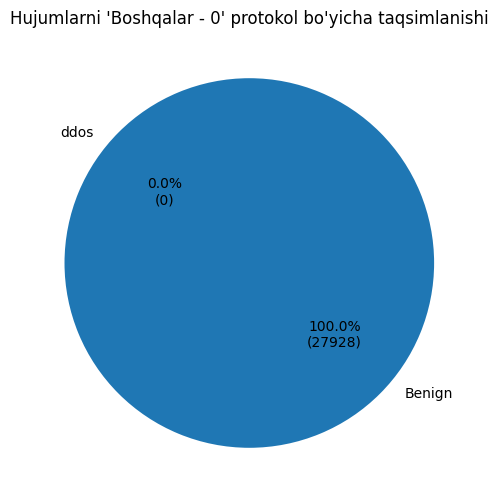

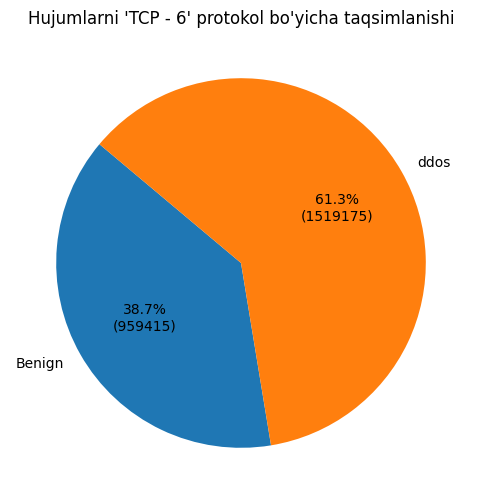

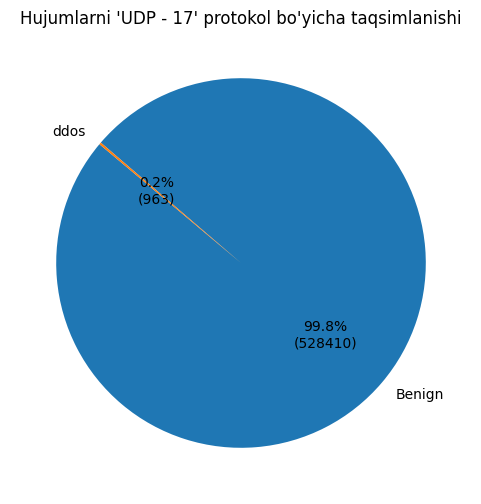

In [32]:
grouped_data = combined_data.groupby(['Protocol', 'Label']).size().unstack(fill_value=0)

# Protokollar
protocols = {0: "Boshqalar - 0", 6: "TCP - 6", 17: "UDP - 17"}
labels = grouped_data.columns

# annotatsiya uchun funksiya
def func(pct, allvals):
    total = sum(allvals)
    return f'{pct:.1f}%\n({int(pct / 100. * total)})'

# har bir protokol uchun diagramma, foiz va son qiymatida
for protocol_value, protocol_name in protocols.items():
    plt.figure(figsize=(6, 6))
    sizes = grouped_data.loc[protocol_value]
    plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
    plt.title(f"Hujumlarni '{protocol_name}' protokol bo'yicha taqsimlanishi")
    plt.show()

#### <center> Protokollarda muammo bo'lganda ddos hujumlar yoq ekan shuning uchun ularni o'chirib tashlaymiz

In [33]:
combined_data = combined_data[combined_data['Protocol'] != 0]
combined_data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1445871,172.31.0.2-172.31.66.76-53-55330-17,172.31.66.76,55330,172.31.0.2,53,17,20/02/2018 10:36:27,22123,2,2,72.0,194.0,36.0,36.0,36.000000,0.000000,97.0,97.0,97.000000,0.000000,12023.685757,180.807305,7.374333e+03,1.131594e+04,20432.0,429.0,21694.0,2.169400e+04,0.000000e+00,21694.0,21694.0,20861.0,2.086100e+04,0.000000e+00,20861.0,20861.0,0,0,16,16,90.403652,90.403652,36.0,97.0,60.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1.0,75.500000,36.000000,97.000000,2,72,2,194,-1,-1,1,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
1,283411,172.217.9.228-192.168.10.15-443-53799-6,192.168.10.15,53799,172.217.9.228,443,6,04/07/2017 12:15:36 AM,3095495,4,2,77.0,92.0,46.0,0.0,19.250000,23.056091,46.0,46.0,46.000000,0.000000,54.595469,1.938301,6.190990e+05,1.322575e+06,2984691.0,3.0,3001930.0,1.000643e+06,1.718257e+06,2984691.0,3.0,37178.0,3.717800e+04,0.000000e+00,37178.0,37178.0,0,1,80,40,1.292200,0.646100,0.0,46.0,30.714286,21.684974,470.238095,0,0,0,1,1,0,0,0,0.0,35.833333,19.250000,46.000000,4,77,2,92,-1,360,2,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
2,6626404,129.158.72.21-172.31.66.121-56889-3389-6,129.158.72.21,56889,172.31.66.121,3389,6,20/02/2018 08:55:58,1127340,8,7,1052.0,1429.0,581.0,0.0,131.500000,196.372096,1149.0,0.0,204.142857,420.499080,2200.755761,13.305658,8.052429e+04,2.559872e+05,968741.0,3.0,1127340.0,1.610486e+05,3.819449e+05,1026973.0,3.0,1114653.0,1.857755e+05,3.841019e+05,968741.0,13853.0,0,0,172,152,7.096351,6.209307,0.0,1149.0,155.062500,302.897005,91746.595833,0,0,1,1,0,0,0,1,0.0,165.400000,131.500000,204.142857,8,1052,7,1429,8192,62948,5,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
3,6314547,172.31.65.117-23.218.55.94-51263-443-6,172.31.65.117,51263,23.218.55.94,443,6,20/02/2018 11:53:46,105120546,16,24,1789.0,3492.0,270.0,0.0,111.812500,116.186757,1053.0,0.0,145.500000,235.555772,50.237563,0.380516,2.695399e+06,5.764629e+06,14914967.0,1.0,105120546.0,7.008036e+06,7.603899e+06,14914967.0,126951.0,105099616.0,4.569549e+06,6.974720e+06,14936234.0,1.0,1,0,320,480,0.152206,0.228309,0.0,1053.0,134.097561,193.430841,37415.490244,0,1,0,0,1,0,0,0,1.0,137.450000,111.812500,145.500000,16,1789,24,3492,254,2105,7,20,137708.714286,11188.587008,158091.0,126951.0,1.486128e+07,31810.084689,14914967.0,14824695.0,Benign
4,7887478,172.31.67.95-94.25.169.113-445-35818-6,94.25.169.113,35818,172.31.67.95,445,6,20/02/2018 10:06:32,1088596,6,6,389.0,209.0,103.0,0.0,64.833333,50.530849,131.0,0.0,34.833333,50.838634,549.331432,11.023373,9.896327e+04,1.550942e+05,495922.0,3.0,1088531.0,2.177062e+05,1.782854e+05,496014.0,3.0,1088550.0,2.177100e+05,1.669438e+05,495963.0,43404.0,0,0,132,144,5.511687,5.511687,0.0,131.0,46.000000,50.565140,2556.833333,0,0,0,1,0,0,0,0,1.0,49.833333,64.833333,34.833333,6,389,6,209,8192,0,4,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [34]:
combined_data["Protocol"].unique()

array([17,  6])

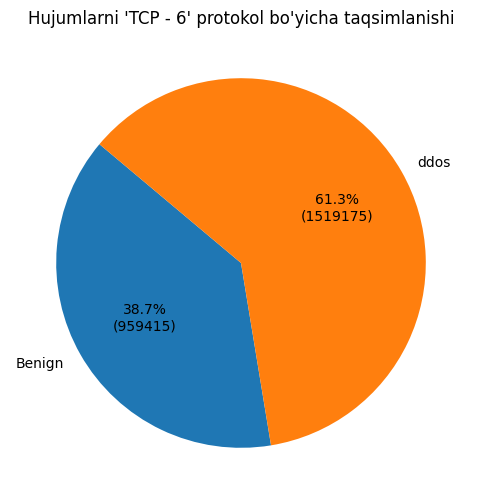

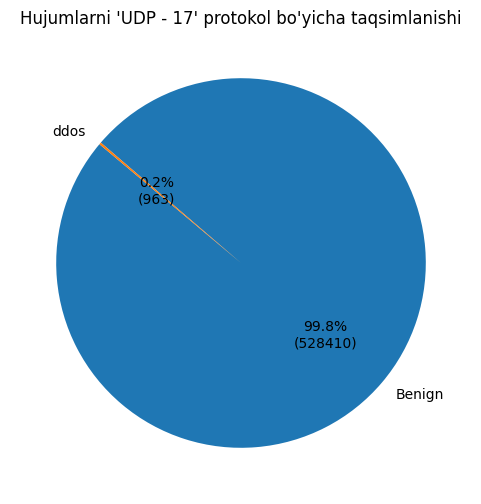

In [35]:
grouped_data = combined_data.groupby(['Protocol', 'Label']).size().unstack(fill_value=0)

# Protokollar
protocols = {6: "TCP - 6", 17: "UDP - 17"}
labels = grouped_data.columns


def func(pct, allvals):
    total = sum(allvals)
    return f'{pct:.1f}%\n({int(pct / 100. * total)})'

for protocol_value, protocol_name in protocols.items():
    plt.figure(figsize=(6, 6))
    sizes = grouped_data.loc[protocol_value]
    plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
    plt.title(f"Hujumlarni '{protocol_name}' protokol bo'yicha taqsimlanishi")
    plt.show()
    #  TCP protokllda hujumlar ko'p ekan

In [36]:
combined_data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1445871,172.31.0.2-172.31.66.76-53-55330-17,172.31.66.76,55330,172.31.0.2,53,17,20/02/2018 10:36:27,22123,2,2,72.0,194.0,36.0,36.0,36.000000,0.000000,97.0,97.0,97.000000,0.000000,12023.685757,180.807305,7.374333e+03,1.131594e+04,20432.0,429.0,21694.0,2.169400e+04,0.000000e+00,21694.0,21694.0,20861.0,2.086100e+04,0.000000e+00,20861.0,20861.0,0,0,16,16,90.403652,90.403652,36.0,97.0,60.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1.0,75.500000,36.000000,97.000000,2,72,2,194,-1,-1,1,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
1,283411,172.217.9.228-192.168.10.15-443-53799-6,192.168.10.15,53799,172.217.9.228,443,6,04/07/2017 12:15:36 AM,3095495,4,2,77.0,92.0,46.0,0.0,19.250000,23.056091,46.0,46.0,46.000000,0.000000,54.595469,1.938301,6.190990e+05,1.322575e+06,2984691.0,3.0,3001930.0,1.000643e+06,1.718257e+06,2984691.0,3.0,37178.0,3.717800e+04,0.000000e+00,37178.0,37178.0,0,1,80,40,1.292200,0.646100,0.0,46.0,30.714286,21.684974,470.238095,0,0,0,1,1,0,0,0,0.0,35.833333,19.250000,46.000000,4,77,2,92,-1,360,2,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
2,6626404,129.158.72.21-172.31.66.121-56889-3389-6,129.158.72.21,56889,172.31.66.121,3389,6,20/02/2018 08:55:58,1127340,8,7,1052.0,1429.0,581.0,0.0,131.500000,196.372096,1149.0,0.0,204.142857,420.499080,2200.755761,13.305658,8.052429e+04,2.559872e+05,968741.0,3.0,1127340.0,1.610486e+05,3.819449e+05,1026973.0,3.0,1114653.0,1.857755e+05,3.841019e+05,968741.0,13853.0,0,0,172,152,7.096351,6.209307,0.0,1149.0,155.062500,302.897005,91746.595833,0,0,1,1,0,0,0,1,0.0,165.400000,131.500000,204.142857,8,1052,7,1429,8192,62948,5,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
3,6314547,172.31.65.117-23.218.55.94-51263-443-6,172.31.65.117,51263,23.218.55.94,443,6,20/02/2018 11:53:46,105120546,16,24,1789.0,3492.0,270.0,0.0,111.812500,116.186757,1053.0,0.0,145.500000,235.555772,50.237563,0.380516,2.695399e+06,5.764629e+06,14914967.0,1.0,105120546.0,7.008036e+06,7.603899e+06,14914967.0,126951.0,105099616.0,4.569549e+06,6.974720e+06,14936234.0,1.0,1,0,320,480,0.152206,0.228309,0.0,1053.0,134.097561,193.430841,37415.490244,0,1,0,0,1,0,0,0,1.0,137.450000,111.812500,145.500000,16,1789,24,3492,254,2105,7,20,137708.714286,11188.587008,158091.0,126951.0,1.486128e+07,31810.084689,14914967.0,14824695.0,Benign
4,7887478,172.31.67.95-94.25.169.113-445-35818-6,94.25.169.113,35818,172.31.67.95,445,6,20/02/2018 10:06:32,1088596,6,6,389.0,209.0,103.0,0.0,64.833333,50.530849,131.0,0.0,34.833333,50.838634,549.331432,11.023373,9.896327e+04,1.550942e+05,495922.0,3.0,1088531.0,2.177062e+05,1.782854e+05,496014.0,3.0,1088550.0,2.177100e+05,1.669438e+05,495963.0,43404.0,0,0,132,144,5.511687,5.511687,0.0,131.0,46.000000,50.565140,2556.833333,0,0,0,1,0,0,0,0,1.0,49.833333,64.833333,34.833333,6,389,6,209,8192,0,4,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#### <center> Timestamp ustuimizdan haqat soatlarni olamiz va Timestamp ustunini o'chirib tashlaymiz

In [37]:
# birinchi bo'lib 11:41:43 kesib olamiz
combined_data['Time'] = combined_data['Timestamp'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None) 

# endi faqat faqat asosiy soatni kesib olamiz
# 11:41:43 bo'lsa 11 ni olamiz
combined_data['Hour'] = combined_data['Time'].apply(lambda x: x.split(':')[0] if x else None)

# O'zimiz yaratgan vaqtinchalik Time ustunini va Timestamp ustunini o'chirib tashlaymiz
combined_data.drop(["Timestamp", "Time"], axis=1, inplace=True)
# Timestamp ichidan AM/PM ni ham olsak bo'lardi va bu ma'lumotlar orqali biz vaqt haqida juda ham ko'p
# ma'lumotlarga ega bo'lishimiz mumkin edi, lekin AM/PM datasetimizning yarmida
# bunday malumotlar yo'q shuning uchun olmadik

/tmp/ipykernel_33/1215960857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Time'] = combined_data['Timestamp'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)
/tmp/ipykernel_33/1215960857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Hour'] = combined_data['Time'].apply(lambda x: x.split(':')[0] if x else None)
/tmp/ipykernel_33/1215960857.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [38]:
combined_data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Hour
0,1445871,172.31.0.2-172.31.66.76-53-55330-17,172.31.66.76,55330,172.31.0.2,53,17,22123,2,2,72.0,194.0,36.0,36.0,36.000000,0.000000,97.0,97.0,97.000000,0.000000,12023.685757,180.807305,7.374333e+03,1.131594e+04,20432.0,429.0,21694.0,2.169400e+04,0.000000e+00,21694.0,21694.0,20861.0,2.086100e+04,0.000000e+00,20861.0,20861.0,0,0,16,16,90.403652,90.403652,36.0,97.0,60.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1.0,75.500000,36.000000,97.000000,2,72,2,194,-1,-1,1,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign,10
1,283411,172.217.9.228-192.168.10.15-443-53799-6,192.168.10.15,53799,172.217.9.228,443,6,3095495,4,2,77.0,92.0,46.0,0.0,19.250000,23.056091,46.0,46.0,46.000000,0.000000,54.595469,1.938301,6.190990e+05,1.322575e+06,2984691.0,3.0,3001930.0,1.000643e+06,1.718257e+06,2984691.0,3.0,37178.0,3.717800e+04,0.000000e+00,37178.0,37178.0,0,1,80,40,1.292200,0.646100,0.0,46.0,30.714286,21.684974,470.238095,0,0,0,1,1,0,0,0,0.0,35.833333,19.250000,46.000000,4,77,2,92,-1,360,2,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign,12
2,6626404,129.158.72.21-172.31.66.121-56889-3389-6,129.158.72.21,56889,172.31.66.121,3389,6,1127340,8,7,1052.0,1429.0,581.0,0.0,131.500000,196.372096,1149.0,0.0,204.142857,420.499080,2200.755761,13.305658,8.052429e+04,2.559872e+05,968741.0,3.0,1127340.0,1.610486e+05,3.819449e+05,1026973.0,3.0,1114653.0,1.857755e+05,3.841019e+05,968741.0,13853.0,0,0,172,152,7.096351,6.209307,0.0,1149.0,155.062500,302.897005,91746.595833,0,0,1,1,0,0,0,1,0.0,165.400000,131.500000,204.142857,8,1052,7,1429,8192,62948,5,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign,08
3,6314547,172.31.65.117-23.218.55.94-51263-443-6,172.31.65.117,51263,23.218.55.94,443,6,105120546,16,24,1789.0,3492.0,270.0,0.0,111.812500,116.186757,1053.0,0.0,145.500000,235.555772,50.237563,0.380516,2.695399e+06,5.764629e+06,14914967.0,1.0,105120546.0,7.008036e+06,7.603899e+06,14914967.0,126951.0,105099616.0,4.569549e+06,6.974720e+06,14936234.0,1.0,1,0,320,480,0.152206,0.228309,0.0,1053.0,134.097561,193.430841,37415.490244,0,1,0,0,1,0,0,0,1.0,137.450000,111.812500,145.500000,16,1789,24,3492,254,2105,7,20,137708.714286,11188.587008,158091.0,126951.0,1.486128e+07,31810.084689,14914967.0,14824695.0,Benign,11
4,7887478,172.31.67.95-94.25.169.113-445-35818-6,94.25.169.113,35818,172.31.67.95,445,6,1088596,6,6,389.0,209.0,103.0,0.0,64.833333,50.530849,131.0,0.0,34.833333,50.838634,549.331432,11.023373,9.896327e+04,1.550942e+05,495922.0,3.0,1088531.0,2.177062e+05,1.782854e+05,496014.0,3.0,1088550.0,2.177100e+05,1.669438e+05,495963.0,43404.0,0,0,132,144,5.511687,5.511687,0.0,131.0,46.000000,50.565140,2556.833333,0,0,0,1,0,0,0,0,1.0,49.833333,64.833333,34.833333,6,389,6,209,8192,0,4,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [39]:
# Hour ustunini intga o'zgartiramiz
combined_data["Hour"] = combined_data["Hour"].astype(int)

/tmp/ipykernel_33/3207398915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data["Hour"] = combined_data["Hour"].astype(int)


In [40]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3007965 entries, 0 to 3040275
Data columns (total 77 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Flow ID            object 
 2   Src IP             object 
 3   Src Port           int64  
 4   Dst IP             object 
 5   Dst Port           int64  
 6   Protocol           int64  
 7   Flow Duration      int64  
 8   Tot Fwd Pkts       int64  
 9   Tot Bwd Pkts       int64  
 10  TotLen Fwd Pkts    float64
 11  TotLen Bwd Pkts    float64
 12  Fwd Pkt Len Max    float64
 13  Fwd Pkt Len Min    float64
 14  Fwd Pkt Len Mean   float64
 15  Fwd Pkt Len Std    float64
 16  Bwd Pkt Len Max    float64
 17  Bwd Pkt Len Min    float64
 18  Bwd Pkt Len Mean   float64
 19  Bwd Pkt Len Std    float64
 20  Flow Byts/s        float64
 21  Flow Pkts/s        float64
 22  Flow IAT Mean      float64
 23  Flow IAT Std       float64
 24  Flow IAT Max       float64
 25  Flow IAT Min       floa

In [41]:
combined_data["Hour"].unique()

array([10, 12,  8, 11,  4,  6,  5,  2,  9,  1,  3,  7])

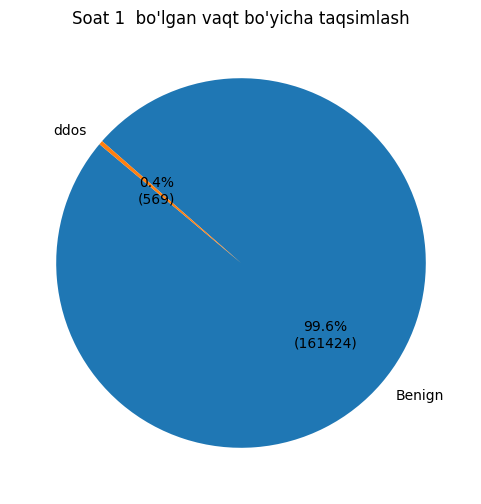

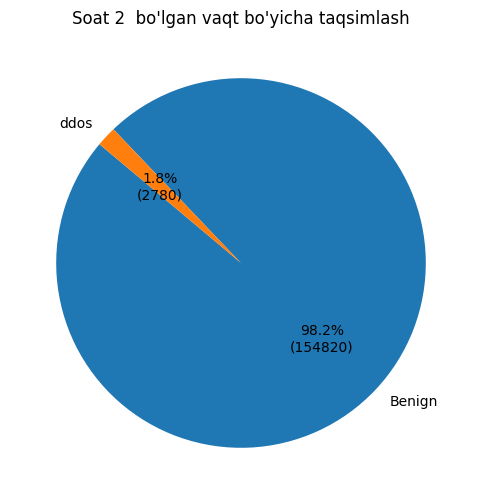

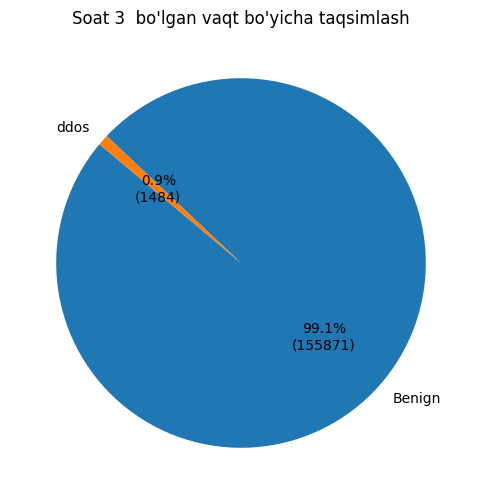

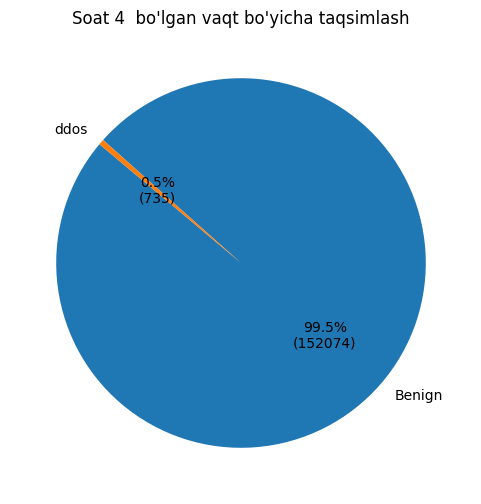

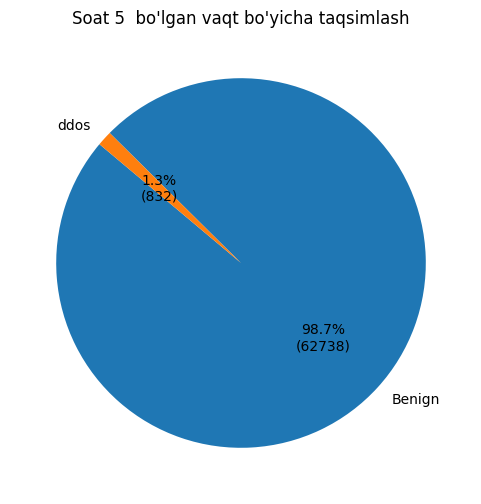

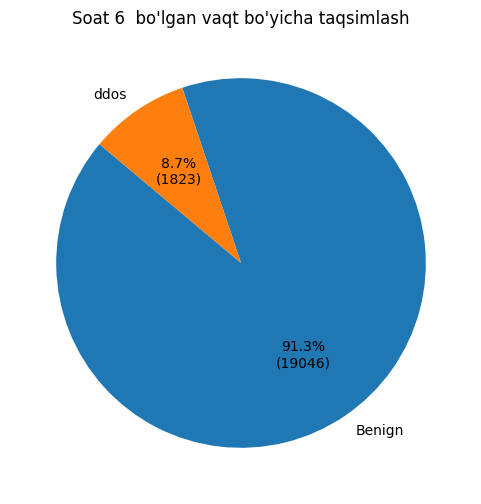

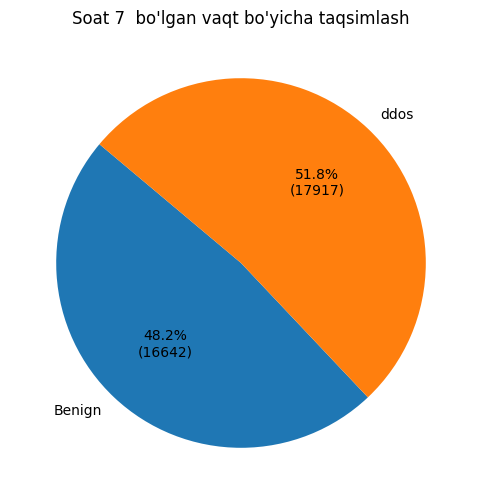

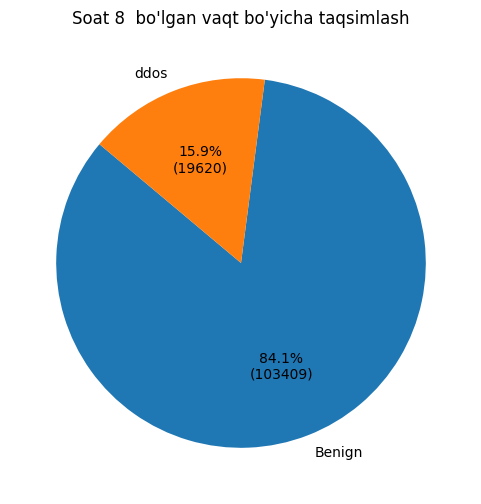

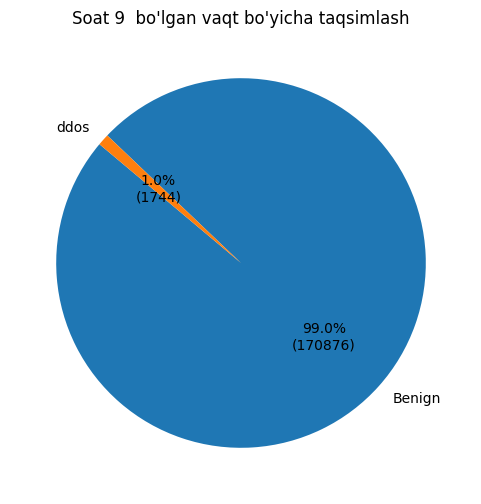

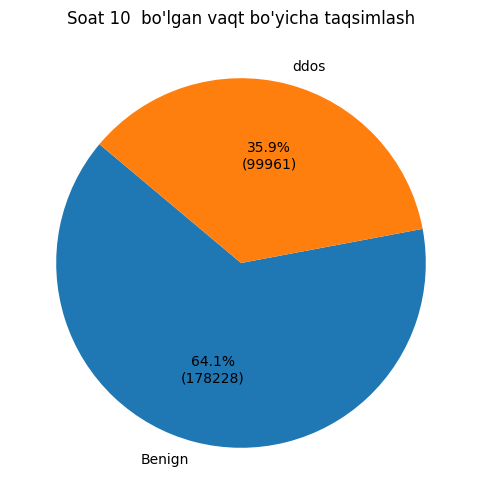

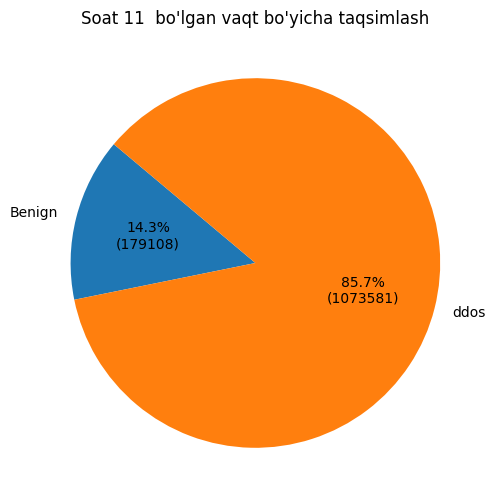

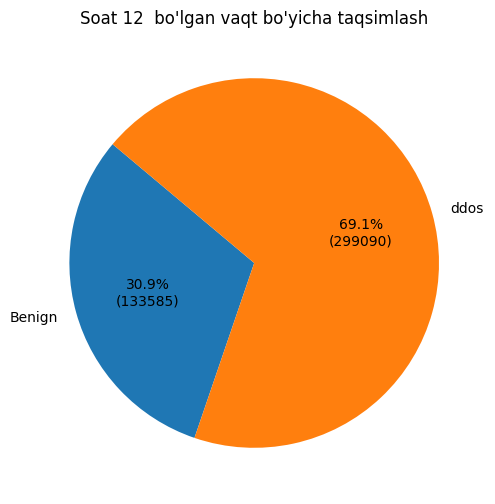

In [42]:
# Qaysi vaqtda hujum ko'proq bo'lganini ko'ramiz
grouped_data = combined_data.groupby(['Hour', 'Label']).size().unstack(fill_value=0)

# vaqtlarni yozib olamiz
protocols = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6",
             7: "7", 8: "8", 9: "9", 10: "10", 11: "11", 12: "12",}

labels = grouped_data.columns


def func(pct, allvals):
    total = sum(allvals)
    return f'{pct:.1f}%\n({int(pct / 100. * total)})'

#  har bir soat vaqt uchun diagramma qurib ko'rib chiqamiz
for protocol_value, protocol_name in protocols.items():
    plt.figure(figsize=(6, 6))
    sizes = grouped_data.loc[protocol_value]
    plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
    plt.title(f"Soat {protocol_name}  bo'lgan vaqt bo'yicha taqsimlash")
    plt.show()

### <center> Tepadagi diagrammalarga e'tibor beradigan bo'lsak eng ko'p ddos hujumlar  soat 11 da bo'lgan ekan(bizning datasetimizda AM/PM hamma datalarda bo'lmagani uchun biz aniq ayta olmaymiz buning hammasi kunduzgi 11 da yoki kechki 11 da bo'lgan deb)

In [43]:
# Hujumlarni Fwd PSH Flags ustuni bo'yicha ko'rib chiqamiz
combined_data["Fwd PSH Flags"].unique()

# TCP (Transmission Control Protocol) kabi tarmoq protokollarida Fwd PSH Flags,
# maʼlumotlar uzatishni tezlashtirish uchun foydalaniladi. Ushbu bayroq TCP paket sarlavhasida 
# o'rnatilganda, bu qabul qiluvchiga ma'lumotlarni to'g'ridan-to'g'ri dasturga hech qanday buferlashsiz 
# uzatilishi kerakligini bildiradi. 

# PSH bayrog'i jo'natuvchiga qabul qiluvchiga keyingi paketlarga kelishi mumkin bo'lgan qo'shimcha
# ma'lumotlarni kutmasdan, joriy paketdagi ma'lumotlar darhol qayta ishlanishi kerakligini
# ko'rsatishiga ruxsat berish uchun ishlatiladi. 

# Masalan: Agar ilova boshqaruv buyruqlari yoki chatlarda xabarlar yoki real vaqtda maʼlumotlarni uzatsa,
# PSH bayrogʻi maʼlumotlarni joʻnatish va uni qabul qiluvchining oxirida qayta ishlash oʻrtasidagi 
# kechikishni minimallashtirish uchun oʻrnatilishi mumkin. 

# Bu yerda 
# 0 qiymati ushbu tarmoq oqimidagi yuborilgan paketlarning hech birida PSH bayrog'i o'rnatilmaganligini
# ko'rsatadi. Bu shuni anglatadiki, ushbu oqimdagi ma'lumotlar qabul qiluvchi dasturga darhol 
# uzatishni talab qilmasdan yuborilgan. 
 
# 1 qiymati ushbu tarmoq oqimidagi yuborilgan paketlardan kamida bittasida PSH bayrog'i o'rnatilganligini
# ko'rsatadi. Bu shuni anglatadiki, jo'natuvchi ma'lumotlarni qabul qiluvchiga buferlashsiz darhol 
# uzatishni talab qildi.

array([0, 1])

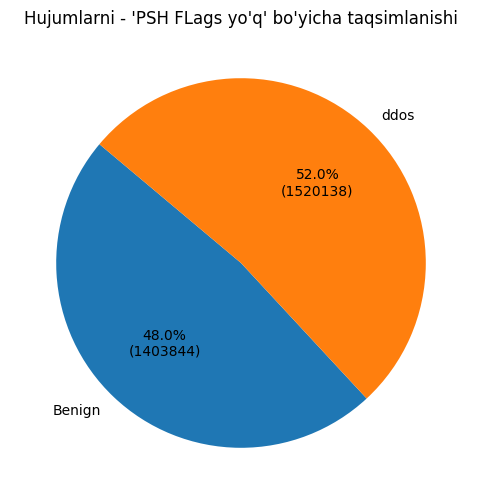

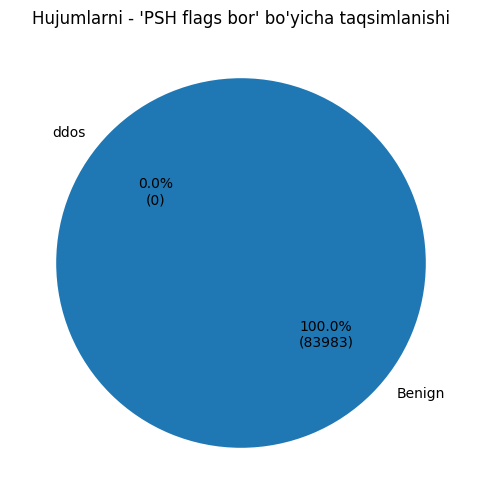

In [44]:
grouped_data = combined_data.groupby(['Fwd PSH Flags', 'Label']).size().unstack(fill_value=0)

# bayroq
protocols = {0: "PSH FLags yo'q", 1: "PSH flags bor"}
labels = grouped_data.columns

def func(pct, allvals):
    total = sum(allvals)
    return f'{pct:.1f}%\n({int(pct / 100. * total)})'

for protocol_value, protocol_name in protocols.items():
    plt.figure(figsize=(6, 6))
    sizes = grouped_data.loc[protocol_value]
    plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
    plt.title(f"Hujumlarni - '{protocol_name}' bo'yicha taqsimlanishi")
    plt.show()
    
# pastdagi grafikda ko'rishimiz mumkinki tezkor bayroq bor bo'lganda ddos hujumlar bo'lmagan

In [45]:
# Hujumlarni Bwd PSH Flags ustuni bo'yicha ko'rib chiqamiz
combined_data["Bwd PSH Flags"].unique()

# Bwd PSH bayroqlari tarmoq oqimida teskari yo'nalishda (qabul qiluvchidan
# jo'natuvchiga) yuborilgan paketlar uchun o'rnatilgan PUSH bayroqlaridir
# (Tepadagi bayroqimizning teskari tomonga harakati).

# Bu yerda
# 0: teskari yo'nalishda yuborilgan paketlarning hech birida PUSH bayrog'i o'rnatilmaganligini ko'rsatadi.
# Bu shuni anglatadiki, ma'lumotlar jo'natuvchi tomonidagi dasturga darhol o'tkazilishini talab 
# qilmasdan uzatildi.

# 1: teskari yo'nalishda yuborilgan paketlardan kamida bittasida PSH bayrog'i o'rnatilganligini bildiradi.
# Bu shuni anglatadiki, ma'lumotlarni teskari yo'nalishda jo'natuvchi ushbu ma'lumotlarni jo'natuvchi 
# tomondagi dasturga darhol o'tkazishni talab qildi. 

# PUSH bayrog'i oqimdagi ma'lumotlar buferda ko'proq ma'lumotlar to'planishini kutmasdan, 
# darhol dasturga o'tkazilishini ta'minlash uchun ishlatiladi. 

array([0, 1])

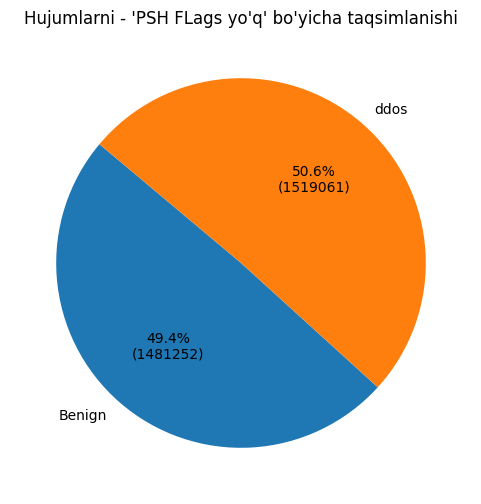

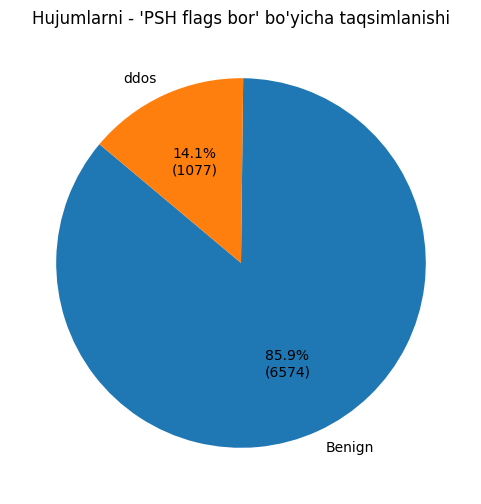

In [46]:
grouped_data = combined_data.groupby(['Bwd PSH Flags', 'Label']).size().unstack(fill_value=0)

protocols = {0: "PSH FLags yo'q", 1: "PSH flags bor"}
labels = grouped_data.columns


def func(pct, allvals):
    total = sum(allvals)
    return f'{pct:.1f}%\n({int(pct / 100. * total)})'

for protocol_value, protocol_name in protocols.items():
    plt.figure(figsize=(6, 6))
    sizes = grouped_data.loc[protocol_value]
    plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
    plt.title(f"Hujumlarni - '{protocol_name}' bo'yicha taqsimlanishi")
    plt.show()
    
# pastdagi diagrammada ko'rishimiz mumkinki tezkor flag yo'q bolganda 1.5 mln ddos hujumlar bo'lgan

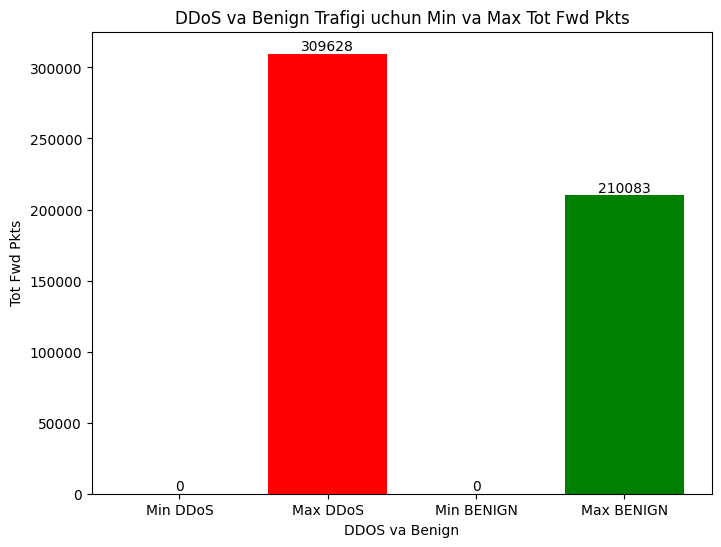

In [47]:
# DDoS va Benign uchun minimal va maksimal "Tot Fwd Pkts" qiymatlarini topamiz
# Tot Fwd Pkts (Total Forward Packets): Manbadan manzilga yuborilgan paketlarning umumiy soni.
# DDoS hujumlarida bu qiymat juda yuqori bo'lishi mumkin, chunki hujum vaqtida ko'pincha paketlarni bitta 
# nishonga ommaviy tarzda ko'p yuboriladi.

min_ddos = combined_data[combined_data['Label'] == 'ddos']['Tot Fwd Pkts'].min()
max_ddos = combined_data[combined_data['Label'] == 'ddos']['Tot Fwd Pkts'].max()

min_benign = combined_data[combined_data['Label'] == 'Benign']['Tot Fwd Pkts'].min()
max_benign = combined_data[combined_data['Label'] == 'Benign']['Tot Fwd Pkts'].max()

labels = ['Min DDoS', 'Max DDoS', 'Min BENIGN', 'Max BENIGN']
values = [min_ddos, max_ddos, min_benign, max_benign]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['red', 'red', 'green', 'green'])

#  har bir ustunga unga tegishli qiyamtlarni yozamiz
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.xlabel('DDOS va Benign')
plt.ylabel('Tot Fwd Pkts')
plt.title('DDoS va Benign Trafigi uchun Min va Max Tot Fwd Pkts')

plt.show()
# ko'rishimiz mumkinki ddos hujum vaqtida Manbadan manzilga yuborilgan paketlarning umumiy soni ko'p

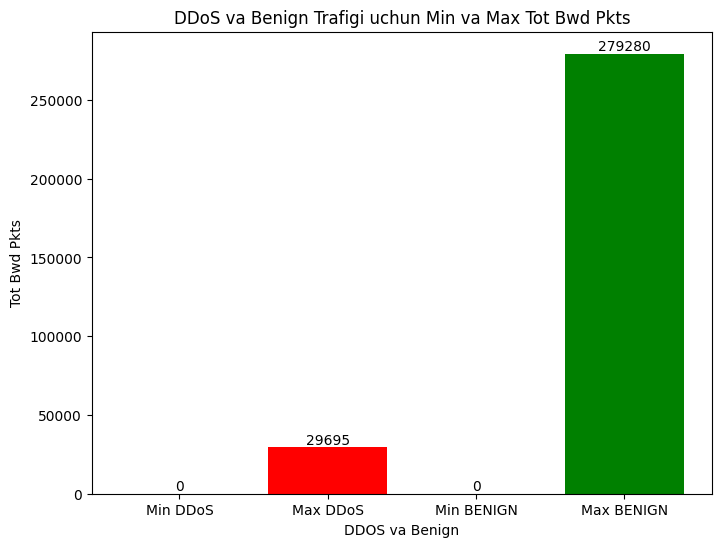

In [48]:
# DDoS va Benign uchun minimal va maksimal "Tot Bwd Pkts" qiymatlarini topamiz
# Tot Bwd Pkts (Total Backward Packets): Belgilangan joydan manbaga yuborilgan paketlarning umumiy soni.
# DDoS hujumlari paytida bu qiymat juda past bo'lishi mumkin, chunki nishon barcha 
# so'rovlarga javob bera olmasligi mumkin.

min_ddos = combined_data[combined_data['Label'] == 'ddos']['Tot Bwd Pkts'].min()
max_ddos = combined_data[combined_data['Label'] == 'ddos']['Tot Bwd Pkts'].max()

min_benign = combined_data[combined_data['Label'] == 'Benign']['Tot Bwd Pkts'].min()
max_benign = combined_data[combined_data['Label'] == 'Benign']['Tot Bwd Pkts'].max()

labels = ['Min DDoS', 'Max DDoS', 'Min BENIGN', 'Max BENIGN']
values = [min_ddos, max_ddos, min_benign, max_benign]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['red', 'red', 'green', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.xlabel('DDOS va Benign')
plt.ylabel('Tot Bwd Pkts')
plt.title('DDoS va Benign Trafigi uchun Min va Max Tot Bwd Pkts')

plt.show()
# pastdagi diagrammaga qarab ko'rishimz mumkinku DDOS vaqtida Tot Bwd Pkts juda past bo'ladi

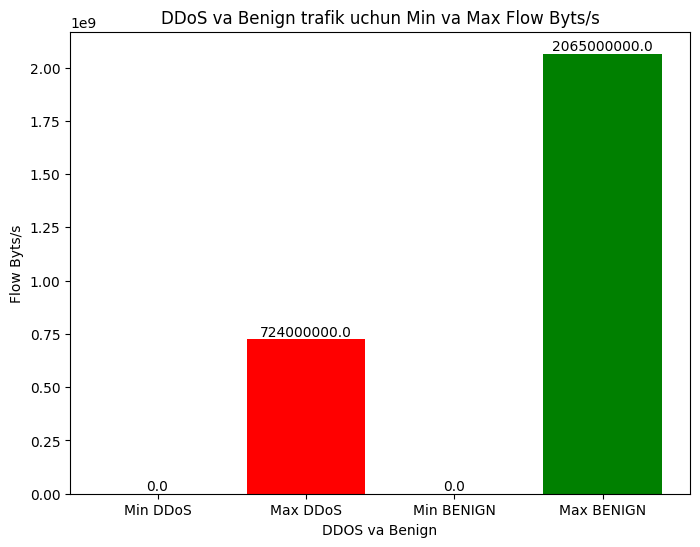

In [49]:
# Oqim bayt/s (sekundiga oqim bayt): soniyada uzatiladigan baytlar soni. 
# DDoS hujumi sodir bo'lgan taqdirda, katta hajmdagi trafik tufayli bu ko'rsatkich keskin oshishi mumkin.

min_ddos = combined_data[combined_data['Label'] == 'ddos']['Flow Byts/s'].min()
max_ddos = combined_data[combined_data['Label'] == 'ddos']['Flow Byts/s'].max()

min_benign = combined_data[combined_data['Label'] == 'Benign']['Flow Byts/s'].min()
max_benign = combined_data[combined_data['Label'] == 'Benign']['Flow Byts/s'].max()

labels = ['Min DDoS', 'Max DDoS', 'Min BENIGN', 'Max BENIGN']
values = [min_ddos, max_ddos, min_benign, max_benign]


plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['red', 'red', 'green', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.xlabel('DDOS va Benign')
plt.ylabel('Flow Byts/s')
plt.title('DDoS va Benign trafik uchun Min va Max Flow Byts/s')

plt.show()
# ko'rishimiz mumkinki DDOS vaqtida Flow Byts/s past ekan

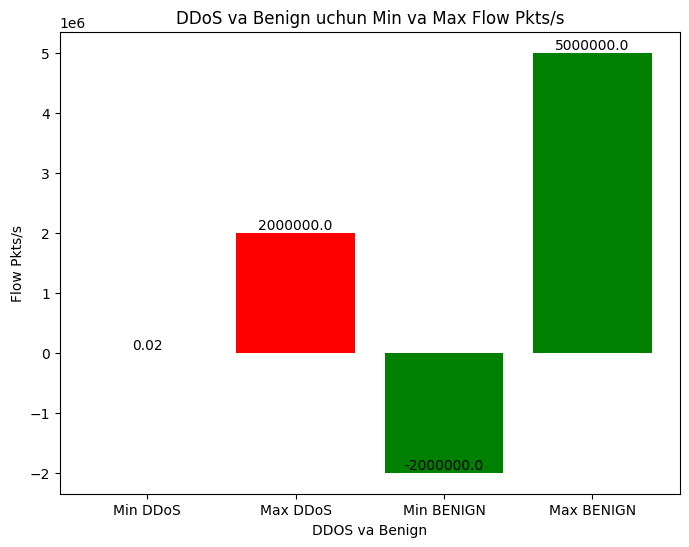

In [50]:
# Flow Pkts/s (Oqim paketlari soniyada): soniyada uzatiladigan paketlar soni.
# DDoS hujumlari vaqt birligidagi paketlar sonini keskin oshirishi mumkin.

min_ddos = combined_data[combined_data['Label'] == 'ddos']['Flow Pkts/s'].min()
max_ddos = combined_data[combined_data['Label'] == 'ddos']['Flow Pkts/s'].max()

min_benign = combined_data[combined_data['Label'] == 'Benign']['Flow Pkts/s'].min()
max_benign = combined_data[combined_data['Label'] == 'Benign']['Flow Pkts/s'].max()

labels = ['Min DDoS', 'Max DDoS', 'Min BENIGN', 'Max BENIGN']
values = [min_ddos, max_ddos, min_benign, max_benign]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['red', 'red', 'green', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('DDOS va Benign')
plt.ylabel('Flow Pkts/s')
plt.title('DDoS va Benign uchun Min va Max Flow Pkts/s')

plt.show()
# pastdagi grafikka e'tibor beradigan bo'lsak minus qiymat bor buni to'girlash kerak
#  chunki -100 ta peket bo'lishi mumkin emas

In [51]:
len(combined_data)

3007965

In [52]:
combined_data = combined_data[combined_data['Flow Pkts/s'] >= 0]
len(combined_data)
# 3 ta -(minus) qiymat bor ekan ularni ochridim, endi boshqatdan ko'ramiz

3007962

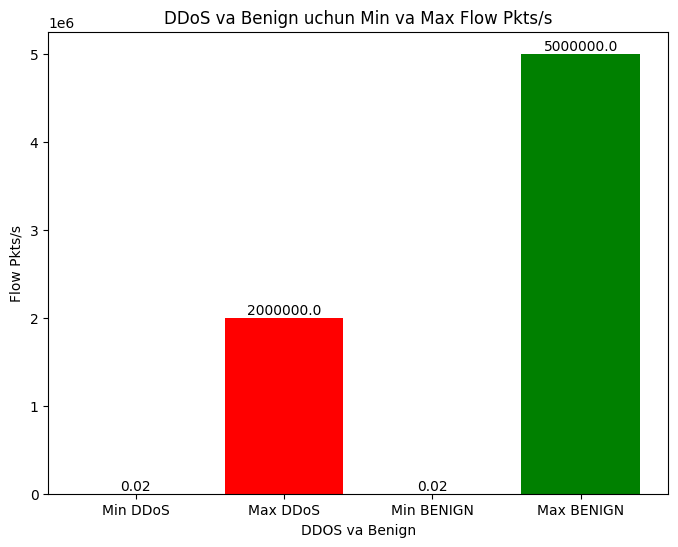

In [53]:
# Flow Pkts/s (Oqim paketlari soniyada): soniyada uzatiladigan paketlar soni.
# DDoS hujumlari vaqt birligidagi paketlar sonini keskin oshirishi mumkin.

min_ddos = combined_data[combined_data['Label'] == 'ddos']['Flow Pkts/s'].min()
max_ddos = combined_data[combined_data['Label'] == 'ddos']['Flow Pkts/s'].max()

min_benign = combined_data[combined_data['Label'] == 'Benign']['Flow Pkts/s'].min()
max_benign = combined_data[combined_data['Label'] == 'Benign']['Flow Pkts/s'].max()

labels = ['Min DDoS', 'Max DDoS', 'Min BENIGN', 'Max BENIGN']
values = [min_ddos, max_ddos, min_benign, max_benign]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['red', 'red', 'green', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('DDOS va Benign')
plt.ylabel('Flow Pkts/s')
plt.title('DDoS va Benign uchun Min va Max Flow Pkts/s')

plt.show()

In [54]:
combined_data.info()
# Flow ID            object  bu bizda Src IP 	Src Port 	Dst IP 	Dst Port 	Protocol 	 dan tashkil topgan ID
# Flow ID bu ustunni ochiramiz
# Src IP             object  bu bizda ip manzil
# Dst IP             object  bu bizda ip manzil
# Label              object  bu class

<class 'pandas.core.frame.DataFrame'>
Index: 3007962 entries, 0 to 3040275
Data columns (total 77 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Flow ID            object 
 2   Src IP             object 
 3   Src Port           int64  
 4   Dst IP             object 
 5   Dst Port           int64  
 6   Protocol           int64  
 7   Flow Duration      int64  
 8   Tot Fwd Pkts       int64  
 9   Tot Bwd Pkts       int64  
 10  TotLen Fwd Pkts    float64
 11  TotLen Bwd Pkts    float64
 12  Fwd Pkt Len Max    float64
 13  Fwd Pkt Len Min    float64
 14  Fwd Pkt Len Mean   float64
 15  Fwd Pkt Len Std    float64
 16  Bwd Pkt Len Max    float64
 17  Bwd Pkt Len Min    float64
 18  Bwd Pkt Len Mean   float64
 19  Bwd Pkt Len Std    float64
 20  Flow Byts/s        float64
 21  Flow Pkts/s        float64
 22  Flow IAT Mean      float64
 23  Flow IAT Std       float64
 24  Flow IAT Max       float64
 25  Flow IAT Min       floa

In [55]:
import ipaddress
# IP manzillarni raqamlarga aylantiramiz
combined_data['Src IP Numeric'] = combined_data['Src IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
combined_data['Dst IP Numeric'] = combined_data['Dst IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
# Keraksiz ustunlarni o'chirib tashlaymiz
combined_data.drop(["Unnamed: 0", "Flow ID","Src IP", "Dst IP"], axis=1, inplace=True)
combined_data['Src IP Numeric']

# IP manzillarni raqamlarga aylantirish Formulasi 
# 172.31.66.76 -> (172×256^3)+(31×256^2)+(66×256^1)+(76×256^0) -> 2887729740

/tmp/ipykernel_33/2823622680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Src IP Numeric'] = combined_data['Src IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
/tmp/ipykernel_33/2823622680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Dst IP Numeric'] = combined_data['Dst IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
/tmp/ipykernel_33/2823622680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

0          2887729740
1          3232238095
2          2174634005
3          2887729525
4          1578740081
              ...    
3040271    2887730460
3040272    2887730457
3040273    2887730457
3040274     316343595
3040275     316391700
Name: Src IP Numeric, Length: 3007962, dtype: int64

In [56]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3007962 entries, 0 to 3040275
Data columns (total 75 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Src Port           int64  
 1   Dst Port           int64  
 2   Protocol           int64  
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    float64
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    float64
 9   Fwd Pkt Len Min    float64
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    float64
 13  Bwd Pkt Len Min    float64
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max        floa

In [57]:
# Labelni ham intga o'tkazib olamiz
combined_data['Label'] = combined_data['Label'].map({'ddos': 1, 'Benign': 0})
combined_data

/tmp/ipykernel_33/2594967545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Label'] = combined_data['Label'].map({'ddos': 1, 'Benign': 0})


,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Hour,Src IP Numeric,Dst IP Numeric
0,55330,53,17,22123,2,2,72.0,194.0,36.0,36.0,36.000000,0.000000,97.0,97.0,97.000000,0.000000,12023.685757,180.807305,7.374333e+03,1.131594e+04,20432.0,429.0,21694.0,2.169400e+04,0.000000e+00,21694.0,21694.0,20861.0,2.086100e+04,0.000000e+00,20861.0,20861.0,0,0,16,16,90.403652,90.403652,36.0,97.0,60.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1.0,75.500000,36.000000,97.000000,2,72,2,194,-1,-1,1,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,10,2887729740,2887712770
1,53799,443,6,3095495,4,2,77.0,92.0,46.0,0.0,19.250000,23.056091,46.0,46.0,46.000000,0.000000,54.595469,1.938301,6.190990e+05,1.322575e+06,2984691.0,3.0,3001930.0,1.000643e+06,1.718257e+06,2984691.0,3.0,37178.0,3.717800e+04,0.000000e+00,37178.0,37178.0,0,1,80,40,1.292200,0.646100,0.0,46.0,30.714286,21.684974,470.238095,0,0,0,1,1,0,0,0,0.0,35.833333,19.250000,46.000000,4,77,2,92,-1,360,2,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,12,3232238095,2899904996
2,56889,3389,6,1127340,8,7,1052.0,1429.0,581.0,0.0,131.500000,196.372096,1149.0,0.0,204.142857,420.499080,2200.755761,13.305658,8.052429e+04,2.559872e+05,968741.0,3.0,1127340.0,1.610486e+05,3.819449e+05,1026973.0,3.0,1114653.0,1.857755e+05,3.841019e+05,968741.0,13853.0,0,0,172,152,7.096351,6.209307,0.0,1149.0,155.062500,302.897005,91746.595833,0,0,1,1,0,0,0,1,0.0,165.400000,131.500000,204.142857,8,1052,7,1429,8192,62948,5,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,8,2174634005,2887729785
3,51263,443,6,105120546,16,24,1789.0,3492.0,270.0,0.0,111.812500,116.186757,1053.0,0.0,145.500000,235.555772,50.237563,0.380516,2.695399e+06,5.764629e+06,14914967.0,1.0,105120546.0,7.008036e+06,7.603899e+06,14914967.0,126951.0,105099616.0,4.569549e+06,6.974720e+06,14936234.0,1.0,1,0,320,480,0.152206,0.228309,0.0,1053.0,134.097561,193.430841,37415.490244,0,1,0,0,1,0,0,0,1.0,137.450000,111.812500,145.500000,16,1789,24,3492,254,2105,7,20,137708.714286,11188.587008,158091.0,126951.0,1.486128e+07,31810.084689,14914967.0,14824695.0,0,11,2887729525,400176990
4,35818,445,6,1088596,6,6,389.0,209.0,103.0,0.0,64.833333,50.530849,131.0,0.0,34.833333,50.838634,549.331432,11.023373,9.896327e+04,1.550942e+05,495922.0,3.0,1088531.0,2.177062e+05,1.782854e+05,496014.0,3.0,1088550.0,2.177100e+05,1.669438e+05,495963.0,43404.0,0,0,132,144,5.511687,5.511687,0.0,131.0,46.000000,50.565140,2556.833333,0,0,0,1,0,0,0,0,1.0,49.833333,64.833333,34.833333,6,389,6,209,8192,0,4,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,10,1578740081,2887730015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040271,80,56047,6,1427,4,3,935.0,315.0,935.0,0.0,233.750000,467.500000,315.0,0.0,105.000000,181.865335,875963.559916,4905.395936,2.378333e+02,3.199140e+02,821.0,7.0,1420.0,4.733333

In [58]:
combined_data.info()
# datamiz endi o'qitishga tayyor

<class 'pandas.core.frame.DataFrame'>
Index: 3007962 entries, 0 to 3040275
Data columns (total 75 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Src Port           int64  
 1   Dst Port           int64  
 2   Protocol           int64  
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    float64
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    float64
 9   Fwd Pkt Len Min    float64
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    float64
 13  Bwd Pkt Len Min    float64
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max        floa

In [59]:
combined_data
# Bizda umumiy 3007962 ta data bor

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Hour,Src IP Numeric,Dst IP Numeric
0,55330,53,17,22123,2,2,72.0,194.0,36.0,36.0,36.000000,0.000000,97.0,97.0,97.000000,0.000000,12023.685757,180.807305,7.374333e+03,1.131594e+04,20432.0,429.0,21694.0,2.169400e+04,0.000000e+00,21694.0,21694.0,20861.0,2.086100e+04,0.000000e+00,20861.0,20861.0,0,0,16,16,90.403652,90.403652,36.0,97.0,60.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1.0,75.500000,36.000000,97.000000,2,72,2,194,-1,-1,1,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,10,2887729740,2887712770
1,53799,443,6,3095495,4,2,77.0,92.0,46.0,0.0,19.250000,23.056091,46.0,46.0,46.000000,0.000000,54.595469,1.938301,6.190990e+05,1.322575e+06,2984691.0,3.0,3001930.0,1.000643e+06,1.718257e+06,2984691.0,3.0,37178.0,3.717800e+04,0.000000e+00,37178.0,37178.0,0,1,80,40,1.292200,0.646100,0.0,46.0,30.714286,21.684974,470.238095,0,0,0,1,1,0,0,0,0.0,35.833333,19.250000,46.000000,4,77,2,92,-1,360,2,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,12,3232238095,2899904996
2,56889,3389,6,1127340,8,7,1052.0,1429.0,581.0,0.0,131.500000,196.372096,1149.0,0.0,204.142857,420.499080,2200.755761,13.305658,8.052429e+04,2.559872e+05,968741.0,3.0,1127340.0,1.610486e+05,3.819449e+05,1026973.0,3.0,1114653.0,1.857755e+05,3.841019e+05,968741.0,13853.0,0,0,172,152,7.096351,6.209307,0.0,1149.0,155.062500,302.897005,91746.595833,0,0,1,1,0,0,0,1,0.0,165.400000,131.500000,204.142857,8,1052,7,1429,8192,62948,5,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,8,2174634005,2887729785
3,51263,443,6,105120546,16,24,1789.0,3492.0,270.0,0.0,111.812500,116.186757,1053.0,0.0,145.500000,235.555772,50.237563,0.380516,2.695399e+06,5.764629e+06,14914967.0,1.0,105120546.0,7.008036e+06,7.603899e+06,14914967.0,126951.0,105099616.0,4.569549e+06,6.974720e+06,14936234.0,1.0,1,0,320,480,0.152206,0.228309,0.0,1053.0,134.097561,193.430841,37415.490244,0,1,0,0,1,0,0,0,1.0,137.450000,111.812500,145.500000,16,1789,24,3492,254,2105,7,20,137708.714286,11188.587008,158091.0,126951.0,1.486128e+07,31810.084689,14914967.0,14824695.0,0,11,2887729525,400176990
4,35818,445,6,1088596,6,6,389.0,209.0,103.0,0.0,64.833333,50.530849,131.0,0.0,34.833333,50.838634,549.331432,11.023373,9.896327e+04,1.550942e+05,495922.0,3.0,1088531.0,2.177062e+05,1.782854e+05,496014.0,3.0,1088550.0,2.177100e+05,1.669438e+05,495963.0,43404.0,0,0,132,144,5.511687,5.511687,0.0,131.0,46.000000,50.565140,2556.833333,0,0,0,1,0,0,0,0,1.0,49.833333,64.833333,34.833333,6,389,6,209,8192,0,4,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,10,1578740081,2887730015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040271,80,56047,6,1427,4,3,935.0,315.0,935.0,0.0,233.750000,467.500000,315.0,0.0,105.000000,181.865335,875963.559916,4905.395936,2.378333e+02,3.199140e+02,821.0,7.0,1420.0,4.733333

# <center> Biz modelimizni <a href="https://arxiv.org/abs/1603.02754" target="_blank">XGBoost</a> algoritmida o'qitishni tanladik

# <center> 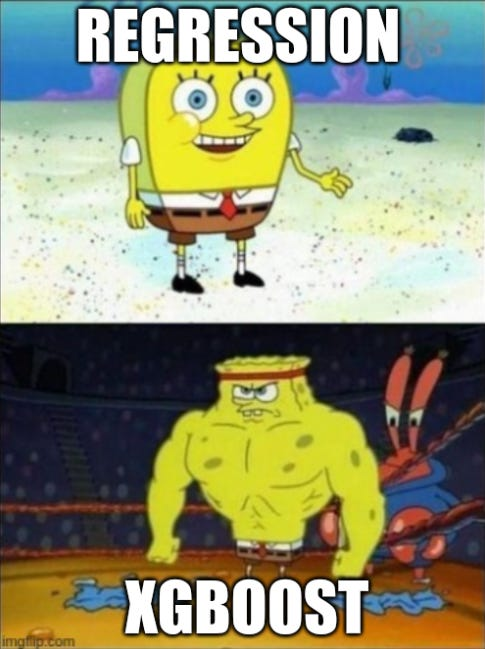

In [60]:
# kerakli kutubxonlarni chaqirib olamiz
from sklearn.model_selection import train_test_split # datasetni train va testga bo'lish uchun kerak
from sklearn.preprocessing import StandardScaler # datasetni normalizatsiya qilish uchun kerak
import xgboost as xgb # xbgoost algoritmi.  https://xgboost.readthedocs.io/en/stable/

In [61]:
# 1-qadam. x va y qiymatlarni to'girlab olamiz
X = combined_data.drop('Label', axis=1)  # Feature
y = combined_data['Label']  # Label

In [62]:
X

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Hour,Src IP Numeric,Dst IP Numeric
0,55330,53,17,22123,2,2,72.0,194.0,36.0,36.0,36.000000,0.000000,97.0,97.0,97.000000,0.000000,12023.685757,180.807305,7.374333e+03,1.131594e+04,20432.0,429.0,21694.0,2.169400e+04,0.000000e+00,21694.0,21694.0,20861.0,2.086100e+04,0.000000e+00,20861.0,20861.0,0,0,16,16,90.403652,90.403652,36.0,97.0,60.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1.0,75.500000,36.000000,97.000000,2,72,2,194,-1,-1,1,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,10,2887729740,2887712770
1,53799,443,6,3095495,4,2,77.0,92.0,46.0,0.0,19.250000,23.056091,46.0,46.0,46.000000,0.000000,54.595469,1.938301,6.190990e+05,1.322575e+06,2984691.0,3.0,3001930.0,1.000643e+06,1.718257e+06,2984691.0,3.0,37178.0,3.717800e+04,0.000000e+00,37178.0,37178.0,0,1,80,40,1.292200,0.646100,0.0,46.0,30.714286,21.684974,470.238095,0,0,0,1,1,0,0,0,0.0,35.833333,19.250000,46.000000,4,77,2,92,-1,360,2,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,12,3232238095,2899904996
2,56889,3389,6,1127340,8,7,1052.0,1429.0,581.0,0.0,131.500000,196.372096,1149.0,0.0,204.142857,420.499080,2200.755761,13.305658,8.052429e+04,2.559872e+05,968741.0,3.0,1127340.0,1.610486e+05,3.819449e+05,1026973.0,3.0,1114653.0,1.857755e+05,3.841019e+05,968741.0,13853.0,0,0,172,152,7.096351,6.209307,0.0,1149.0,155.062500,302.897005,91746.595833,0,0,1,1,0,0,0,1,0.0,165.400000,131.500000,204.142857,8,1052,7,1429,8192,62948,5,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,8,2174634005,2887729785
3,51263,443,6,105120546,16,24,1789.0,3492.0,270.0,0.0,111.812500,116.186757,1053.0,0.0,145.500000,235.555772,50.237563,0.380516,2.695399e+06,5.764629e+06,14914967.0,1.0,105120546.0,7.008036e+06,7.603899e+06,14914967.0,126951.0,105099616.0,4.569549e+06,6.974720e+06,14936234.0,1.0,1,0,320,480,0.152206,0.228309,0.0,1053.0,134.097561,193.430841,37415.490244,0,1,0,0,1,0,0,0,1.0,137.450000,111.812500,145.500000,16,1789,24,3492,254,2105,7,20,137708.714286,11188.587008,158091.0,126951.0,1.486128e+07,31810.084689,14914967.0,14824695.0,11,2887729525,400176990
4,35818,445,6,1088596,6,6,389.0,209.0,103.0,0.0,64.833333,50.530849,131.0,0.0,34.833333,50.838634,549.331432,11.023373,9.896327e+04,1.550942e+05,495922.0,3.0,1088531.0,2.177062e+05,1.782854e+05,496014.0,3.0,1088550.0,2.177100e+05,1.669438e+05,495963.0,43404.0,0,0,132,144,5.511687,5.511687,0.0,131.0,46.000000,50.565140,2556.833333,0,0,0,1,0,0,0,0,1.0,49.833333,64.833333,34.833333,6,389,6,209,8192,0,4,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,10,1578740081,2887730015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040271,80,56047,6,1427,4,3,935.0,315.0,935.0,0.0,233.750000,467.500000,315.0,0.0,105.000000,181.865335,875963.559916,4905.395936,2.378333e+02,3.199140e+02,821.0,7.0,1420.0,4.733333e+02,6.355740e+02,12

In [63]:
y

0          0
1          0
2          0
3          0
4          0
          ..
3040271    1
3040272    1
3040273    1
3040274    1
3040275    1
Name: Label, Length: 3007962, dtype: int64

In [64]:
# 2-qadam. x qiymatlarimizni normalizatsiya qilib olamiz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# 3-qadam. datasetimizni train va testga bo'lib olamiz.(shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)
# shuffle=True bizga aralashgan datasetni olishga yordam beradi

In [66]:
X_train

array([[ 0.73752701, -0.62900384, -0.46214593, ...,  0.61167738,
        -1.40912868,  0.60122618],
       [ 0.53602663, -0.62900384, -0.46214593, ...,  0.61167738,
        -1.40904586,  0.60122618],
       [ 1.05235884, -0.63017707,  2.16381869, ..., -1.91616406,
         0.70444748,  0.60121055],
       ...,
       [ 0.79665298, -0.62900384, -0.46214593, ...,  0.61167738,
        -1.40909198,  0.60122619],
       [-1.50297955,  0.98979033, -0.46214593, ...,  0.61167738,
         0.70444832, -1.67202699],
       [ 0.81869521, -0.62900384, -0.46214593, ...,  0.61167738,
        -1.40904586,  0.60122618]])

In [67]:
y_train

1719963    1
1620811    1
864756     0
380404     0
2494324    1
          ..
1725057    1
2388644    1
2261398    1
2800621    1
2251424    1
Name: Label, Length: 2406369, dtype: int64

In [68]:
# 4-qadam. Modelni yaratib olamiz
model = xgb.XGBClassifier(
    objective='binary:logistic', #  2 class uchun
    eval_metric=['logloss', 'error'], # loss va errorni(1-accuracy) kuzatamiz
    use_label_encoder=False,
    n_estimators=100, # daraxtlar soni = 100
    max_depth=6, # daraxt chuqurligi 6 
    learning_rate=0.1, #o'rganish qadami = 0.1
    random_state=42 
)

In [69]:
# 5-qadam. Bizning metrikalarimiz 
# eval_metric=['logloss', 'error'] qaysi datalarni kuzatishi kerakligini kp'rsatamiz 
evals = [(X_train, y_train), (X_test, y_test)]


In [70]:
# 6-qadam. Modelni o'qitamiz
history = model.fit(X_train, y_train, eval_set=evals, verbose=True)


[0]	validation_0-logloss:0.59822	validation_0-error:0.00050	validation_1-logloss:0.59823	validation_1-error:0.00054
[1]	validation_0-logloss:0.52053	validation_0-error:0.00050	validation_1-logloss:0.52054	validation_1-error:0.00054
[2]	validation_0-logloss:0.45574	validation_0-error:0.00050	validation_1-logloss:0.45576	validation_1-error:0.00054
[3]	validation_0-logloss:0.40098	validation_0-error:0.00050	validation_1-logloss:0.40100	validation_1-error:0.00054
[4]	validation_0-logloss:0.35421	validation_0-error:0.00050	validation_1-logloss:0.35422	validation_1-error:0.00054
[5]	validation_0-logloss:0.31391	validation_0-error:0.00050	validation_1-logloss:0.31393	validation_1-error:0.00054
[6]	validation_0-logloss:0.27892	validation_0-error:0.00047	validation_1-logloss:0.27894	validation_1-error:0.00050
[7]	validation_0-logloss:0.24840	validation_0-error:0.00047	validation_1-logloss:0.24842	validation_1-error:0.00050
[8]	validation_0-logloss:0.22166	validation_0-error:0.00019	validation_1

In [71]:
#7-qadam. Evaulate
results = history.evals_result()

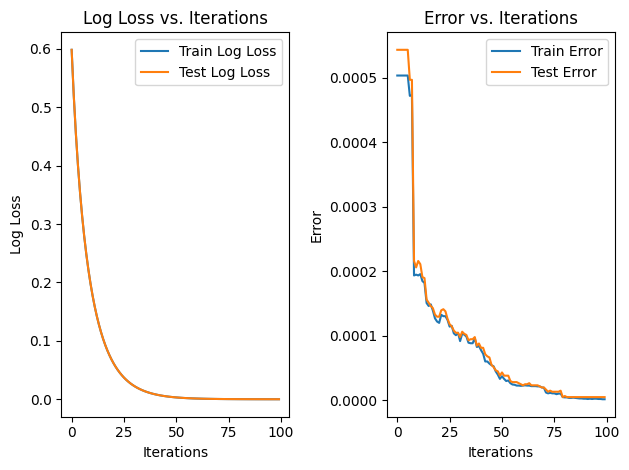

In [72]:
# Log Loss
plt.subplot(1, 2, 1)
plt.plot(results['validation_0']['logloss'], label='Train Log Loss')
plt.plot(results['validation_1']['logloss'], label='Test Log Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Iterations')
plt.legend()

# Error(1-Accuracy)
plt.subplot(1, 2, 2)
plt.plot(results['validation_0']['error'], label='Train Error')
plt.plot(results['validation_1']['error'], label='Test Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs. Iterations')
plt.legend()

plt.tight_layout()
plt.show()
# ko'rib turganingdek loss va error judaham yaxshi pasaygan

In [73]:
# xbgostning o'zida accuracy yo'q shuning uchun sklearn orqali accuracy-ni olamiz
from sklearn.metrics import classification_report, accuracy_score

# bashorat
y_pred = model.predict(X_test)

# accuracy-ni hisoblaymiz
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# juda yaxshi natija

Accuracy: 0.9999950132398482
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    297867
           1       1.00      1.00      1.00    303726

    accuracy                           1.00    601593
   macro avg       1.00      1.00      1.00    601593
weighted avg       1.00      1.00      1.00    601593



#  <center> 👨‍💻 🚀